# Figures and Good Data Analysis For Free-Space-Imaging Stuff

In [1]:
# current date, for retrieving data from proper location.
year = "2021"
month = "April"
day = "21"

In [2]:
%config Completer.use_jedi = False
import numpy as np 
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle

from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)

In [451]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n0State, n1State, n2State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

In [4]:
atomlocs = [6,7,3,2,1]
loadOne = tao.condition([0], [0], [1], markerWhichPicList=[0], markerLocList=[0])
loadNotOne = tao.condition([0],[0], [0])

loadLeft = tao.condition([0,0],[0,1], [1,0], markerWhichPicList=[0], markerLocList=[0])
loadRight = tao.condition([0,0],[0,1], [0,1], markerWhichPicList=[0], markerLocList=[1])
loadBoth = tao.condition([0,0],[0,1], [1,1], markerWhichPicList=[0,0], markerLocList=[0,1])
loadNeither = tao.condition([0,0],[0,1], [0,0])

loadOneOption = tao.TransferAnalysisOptions( [11,11,3,1,1], [11,11,3,1,1], 0,1, [[loadOne], [loadNotOne]], [None, None]);
loadLeftOption = tao.TransferAnalysisOptions( atomlocs, atomlocs, 0,1, [[loadLeft], [loadNeither]],[None, None]);
loadRightOption = tao.TransferAnalysisOptions( atomlocs, atomlocs, 0,1, [[loadRight], [loadNeither]],[None, None]);
loadBothOption = tao.TransferAnalysisOptions( atomlocs, atomlocs, 0,1, [[loadBoth], [loadNeither]],[None, None]);
loadNoneOption = tao.TransferAnalysisOptions( atomlocs, atomlocs, 0,1, [[loadNeither], [loadNeither]],[None, None]);

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Importing Data

### File 4: data with time = 10us

Number of Pictures: 40000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 20000;	Exp File Version: 4;
Experiment started at (H:M:S) 13:5:10: on (Y-M-D) 2021-5-5, And ended at 14:58:26: on 2021-5-5
Experiment Notes: okay this looks pretty good actually. hmm



### File 5: more data

Number of Pictures: 40000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 20000;	Exp File Version: 4;
Experiment started at (H:M:S) 15:21:55: on (Y-M-D) 2021-5-5, And ended at 17:15:13: on 2021-5-5
Experiment Notes: 0.01ms imaging time still



### File 7: moar

Number of Pictures: 40000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 20000;	Exp File Version: 4;
Experiment started at (H:M:S) 17:28:9: on (Y-M-D) 2021-5-5, And ended at 19:21:30: on 2021-5-5
Experiment Notes: moar



### File 9: more data

Number of Pictures: 40000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 20000;	Exp File Version: 4;
Experiment started at (H:M:S) 19:36:30: on (Y-M-D) 2021-5-5, And ended at 21:29:51: on 2021-5-5
Experiment Notes: more



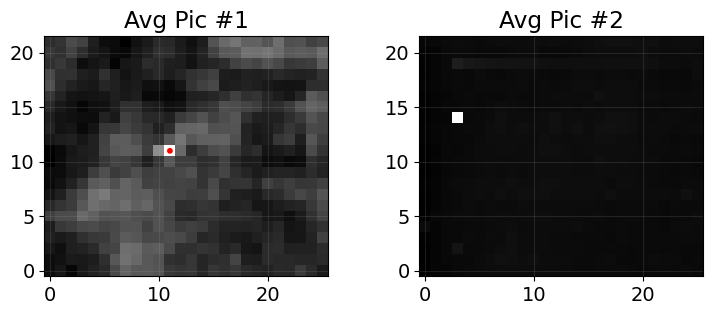

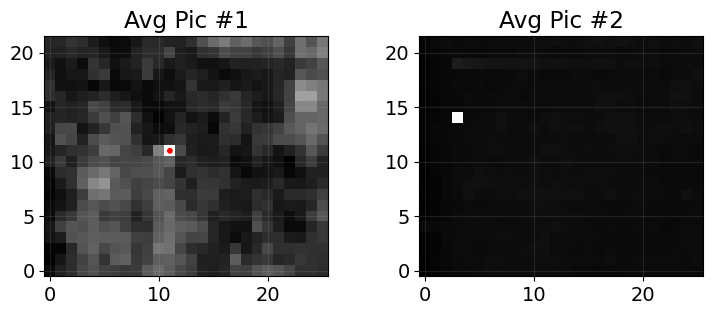

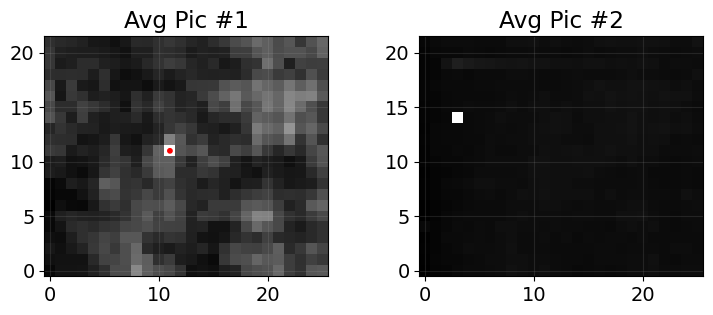

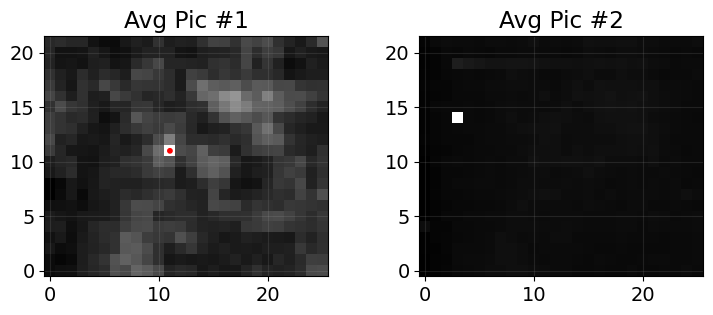

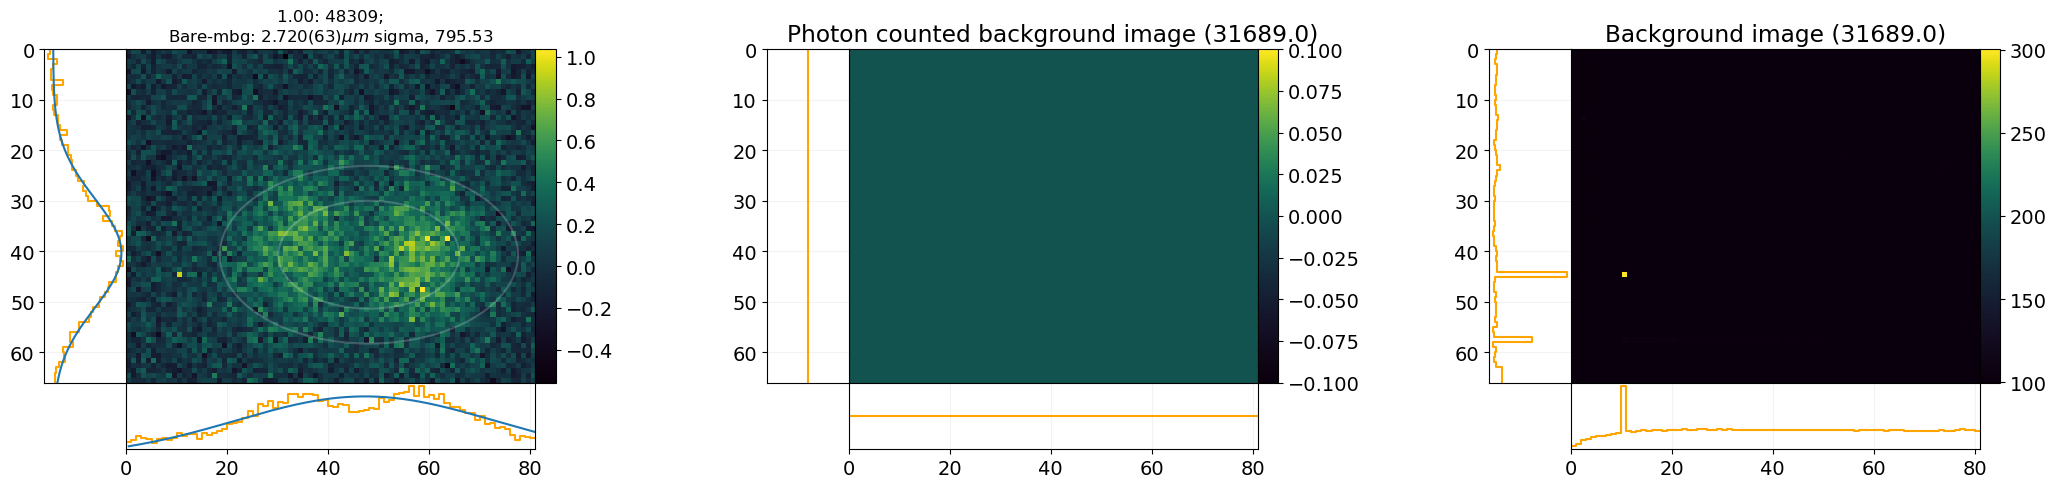

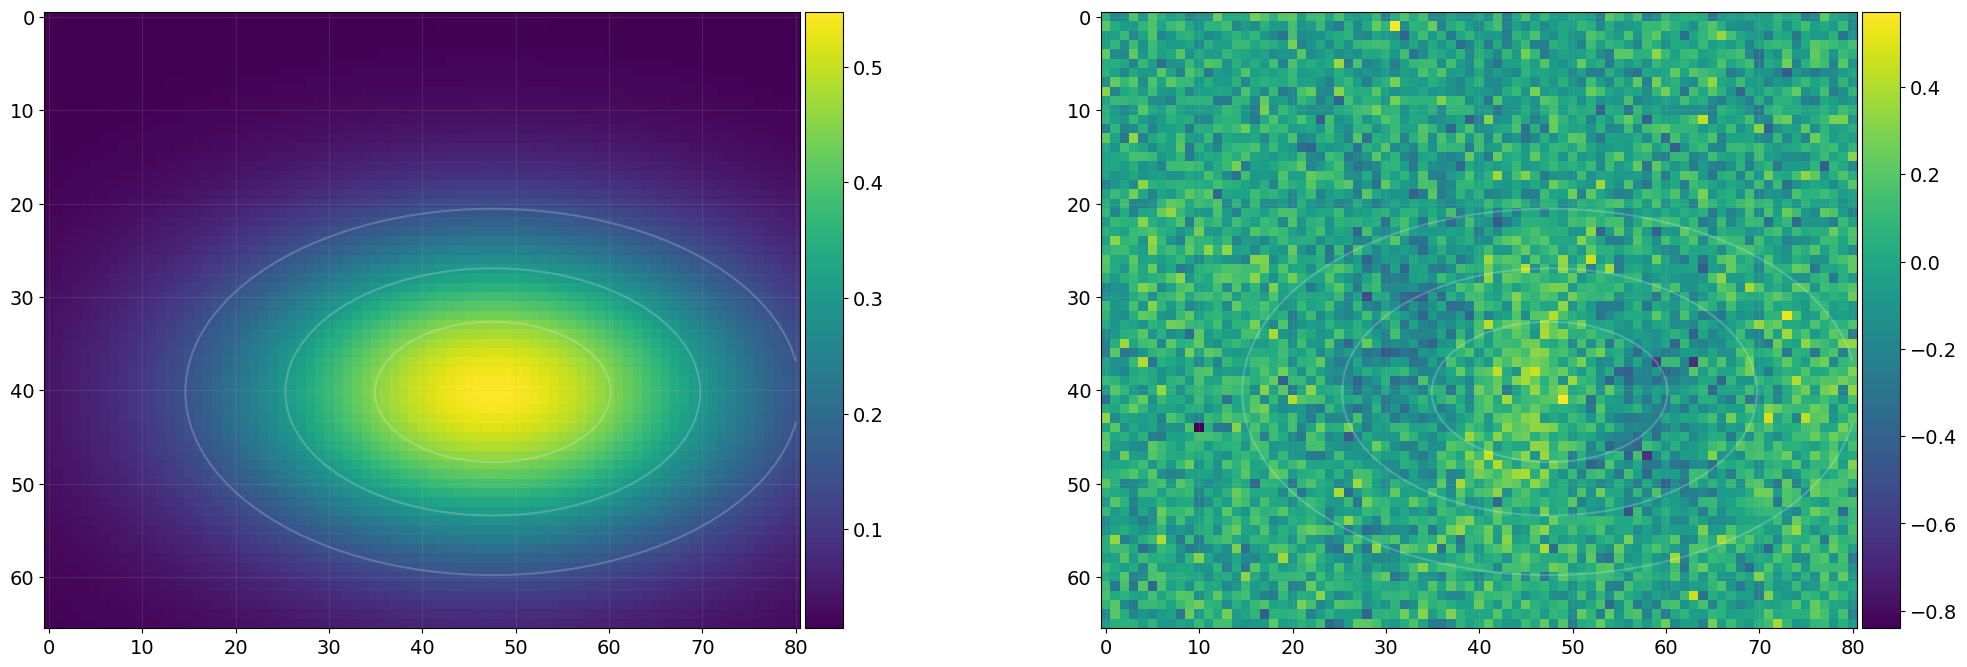

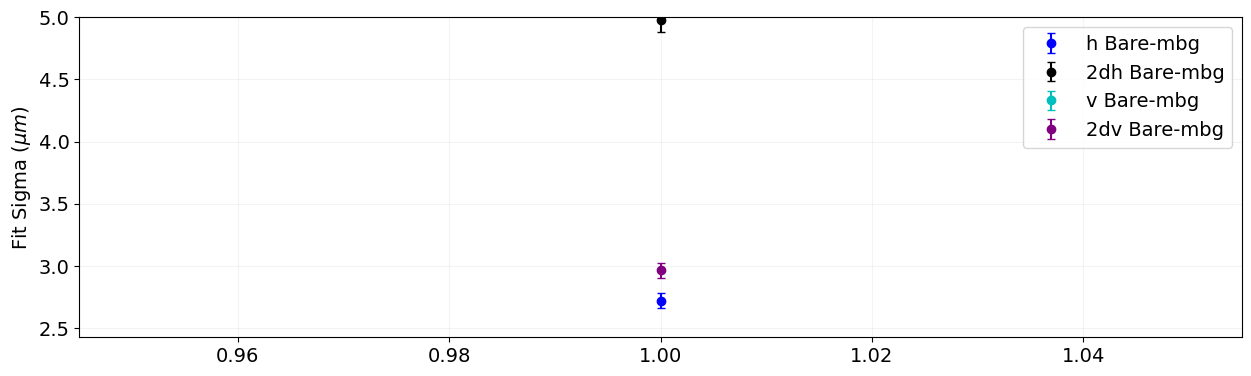

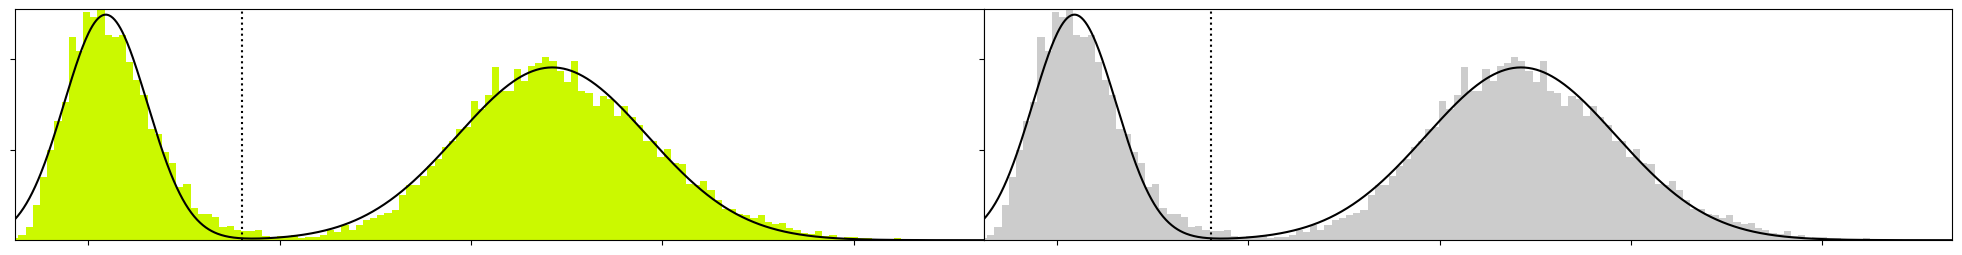

In [920]:
reloadMyModules(5,'May')
resn1_2 = fsi.freespaceImageAnalysis( [4,5,7,9], picsPerRep=2, startPic=1, bgInput=None, onlyThisPic=2, plotSigmas=True, 
                                    plotCounts=False, win=pw.PictureWindow(), transferAnalysisOpts=loadOneOption,
                                    extraTferAnalysisArgs = { 'win':pw.PictureWindow(1,-2), 'binningParams':(3,3), 
                                                            'tOptions':[to.ThresholdOptions(histBinSize=75)], 
                                                            'picsPerRep':2}, showTferAnalysisPlots=True, plotFitAmps=False);

### File 4: n=1 without extra wait time

Number of Pictures: 10000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 5000;	Exp File Version: 4;
Experiment started at (H:M:S) 11:31:14: on (Y-M-D) 2021-4-22, And ended at 12:2:58: on 2021-4-22
Experiment Notes: okay this should be good now just need lots of data...



### File 5: data 2

Number of Pictures: 10000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 5000;	Exp File Version: 4;
Experiment started at (H:M:S) 12:11:8: on (Y-M-D) 2021-4-22, And ended at 12:44:57: on 2021-4-22
Experiment Notes: moar 



### File 6: more data

Number of Pictures: 10000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 5000;	Exp File Version: 4;
Experiment started at (H:M:S) 12:45:59: on (Y-M-D) 2021-4-22, And ended at 13:19:50: on 2021-4-22
Experiment Notes: more...



### File 7: more data

Number of Pictures: 10000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 5000;	Exp File Version: 4;
Experiment started at (H:M:S) 13:25:47: on (Y-M-D) 2021-4-22, And ended at 13:59:36: on 2021-4-22
Experiment Notes: moar



### File 8: moar data

Number of Pictures: 10000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 5000;	Exp File Version: 4;
Experiment started at (H:M:S) 14:56:20: on (Y-M-D) 2021-4-22, And ended at 15:30:10: on 2021-4-22
Experiment Notes: ma



### File 9: moa

Number of Pictures: 10000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 5000;	Exp File Version: 4;
Experiment started at (H:M:S) 15:59:6: on (Y-M-D) 2021-4-22, And ended at 16:32:57: on 2021-4-22
Experiment Notes: moa



### File 10: more data...

Number of Pictures: 10000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 5000;	Exp File Version: 4;
Experiment started at (H:M:S) 16:33:10: on (Y-M-D) 2021-4-22, And ended at 17:7:0: on 2021-4-22
Experiment Notes: more...



### File 11: moar

Number of Pictures: 10000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 5000;	Exp File Version: 4;
Experiment started at (H:M:S) 17:7:52: on (Y-M-D) 2021-4-22, And ended at 17:41:41: on 2021-4-22
Experiment Notes: moar



### File 12: moar data

Number of Pictures: 10000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 5000;	Exp File Version: 4;
Experiment started at (H:M:S) 17:42:10: on (Y-M-D) 2021-4-22, And ended at 18:16:24: on 2021-4-22
Experiment Notes: moar



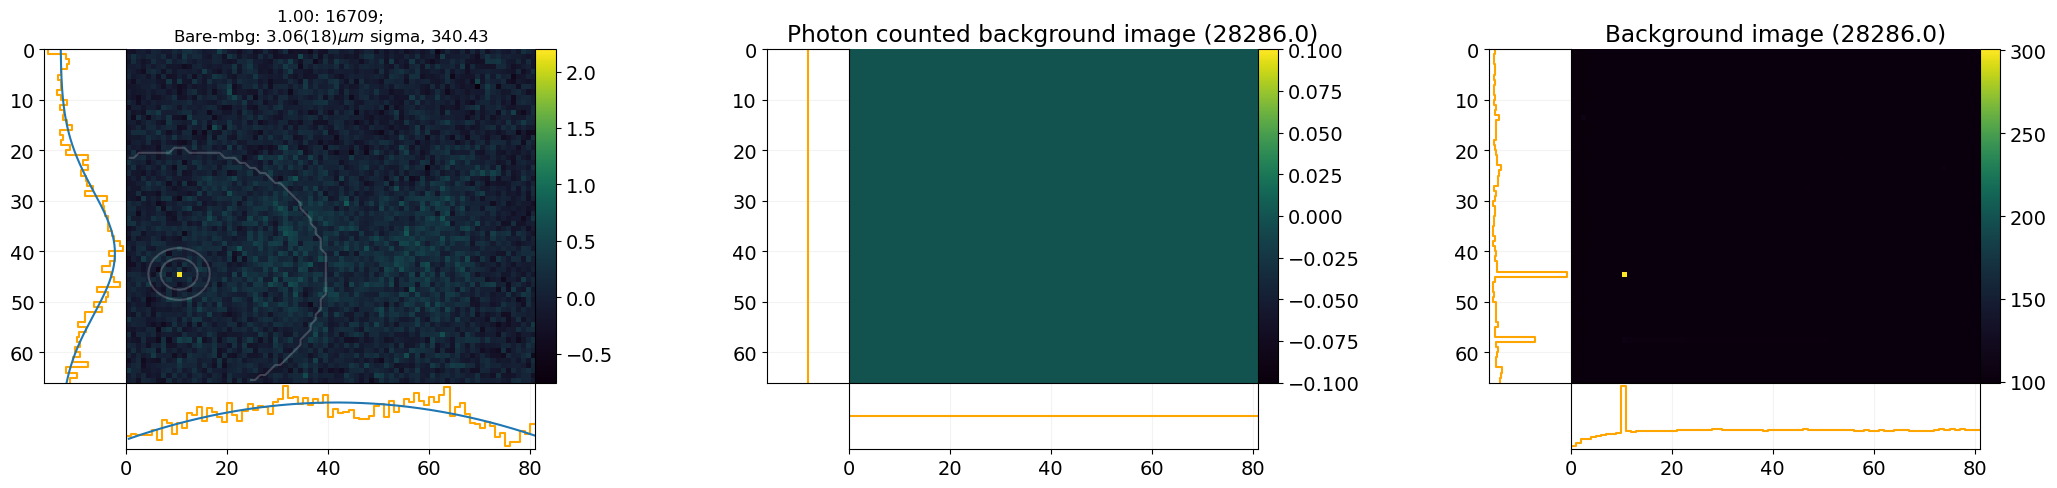

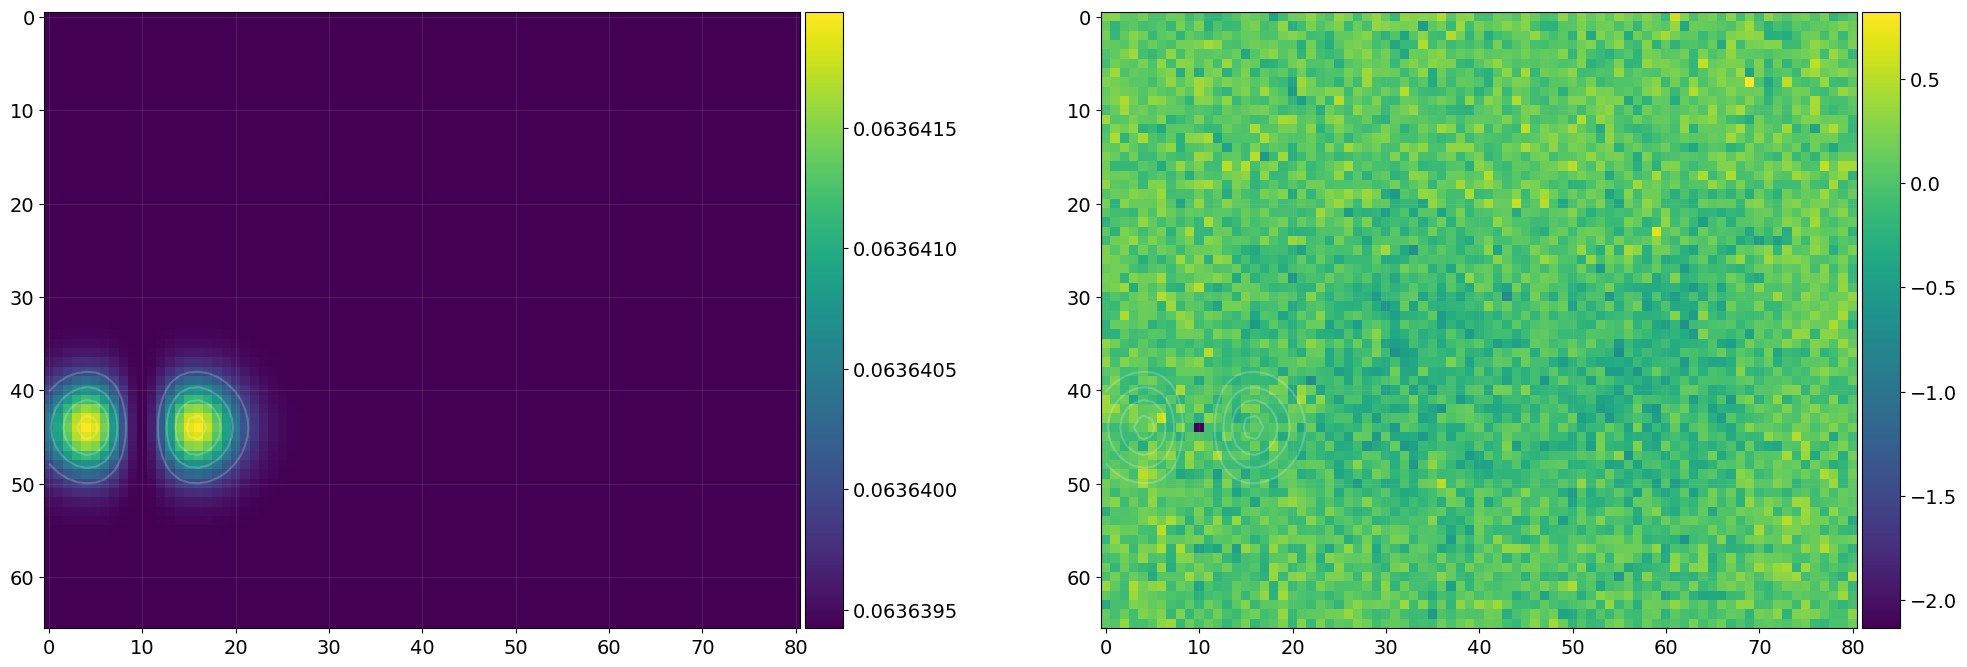

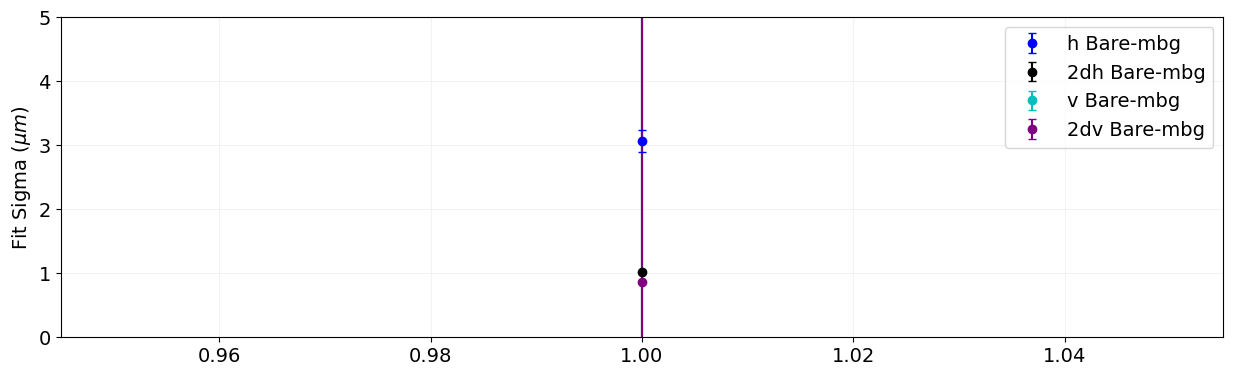

In [6]:
reloadMyModules(22)
resn1 = fsi.freespaceImageAnalysis([4, 5, 6, 7, 8, 9, 10, 11, 12], picsPerRep=2, startPic=1, bgInput=None, onlyThisPic=2, plotSigmas=True, plotCounts=False,
                                  win=pw.PictureWindow(), transferAnalysisOpts=loadOneOption,
                                  extraTferAnalysisArgs = { 'win':pw.PictureWindow(1,-2), 'binningParams':(3,3), 
                                                            'tOptions':[to.ThresholdOptions(histBinSize=75)], 'picsPerRep':2}, 
                                 showTferAnalysisPlots=False, plotFitAmps=False, indvColorRanges=True, fitF2D=n1State.f);

Hor temperature = 0.338(15)uk
Vert temperature = 0.189(10)uk
Hor2D temperature = 0.263(15)uk
Vert2D temperature = 0.262(11)uk


### File 9: expansion at proper depth

Number of Pictures: 12000; Picture Dimensions: 66 x 81
Variations: 6;	Repetitions: 1000;	Exp File Version: 4;
Experiment started at (H:M:S) 15:30:33: on (Y-M-D) 2021-4-21, And ended at 16:12:10: on 2021-4-21
Experiment Notes: okay need moar dayta
Extra Experiment Note #1: prev was accidentally at 0.06, which is deeper than where I've been doing adiabatic ramps.



### File 10: moar dayta

Number of Pictures: 12000; Picture Dimensions: 66 x 81
Variations: 6;	Repetitions: 1000;	Exp File Version: 4;
Experiment started at (H:M:S) 16:14:0: on (Y-M-D) 2021-4-21, And ended at 16:55:36: on 2021-4-21
Experiment Notes: looking good



### File 11: more data

Number of Pictures: 12000; Picture Dimensions: 66 x 81
Variations: 6;	Repetitions: 1000;	Exp File Version: 4;
Experiment started at (H:M:S) 16:57:9: on (Y-M-D) 2021-4-21, And ended at 17:38:46: on 2021-4-21
Experiment Notes: fitting still having some trouble. need to implement the smarter fitting.



### File 12: moar data

Number of Pictures: 12000; Picture Dimensions: 66 x 81
Variations: 6;	Repetitions: 1000;	Exp File Version: 4;
Experiment started at (H:M:S) 17:55:20: on (Y-M-D) 2021-4-21, And ended at 18:36:56: on 2021-4-21
Experiment Notes: moar



### File 13: moar

Number of Pictures: 12000; Picture Dimensions: 66 x 81
Variations: 6;	Repetitions: 1000;	Exp File Version: 4;
Experiment started at (H:M:S) 19:9:54: on (Y-M-D) 2021-4-21, And ended at 19:51:30: on 2021-4-21
Experiment Notes: moar



### File 14: more data

Number of Pictures: 12000; Picture Dimensions: 66 x 81
Variations: 6;	Repetitions: 1000;	Exp File Version: 4;
Experiment started at (H:M:S) 20:19:51: on (Y-M-D) 2021-4-21, And ended at 21:1:27: on 2021-4-21
Experiment Notes: more data again



### File 15: moa

Number of Pictures: 12000; Picture Dimensions: 66 x 81
Variations: 6;	Repetitions: 1000;	Exp File Version: 4;
Experiment started at (H:M:S) 21:33:46: on (Y-M-D) 2021-4-21, And ended at 22:15:22: on 2021-4-21
Experiment Notes: moa



### File 16: last data set

Number of Pictures: 12000; Picture Dimensions: 66 x 81
Variations: 6;	Repetitions: 1000;	Exp File Version: 4;
Experiment started at (H:M:S) 22:42:51: on (Y-M-D) 2021-4-21, And ended at 23:24:27: on 2021-4-21
Experiment Notes: okay, sensible enough



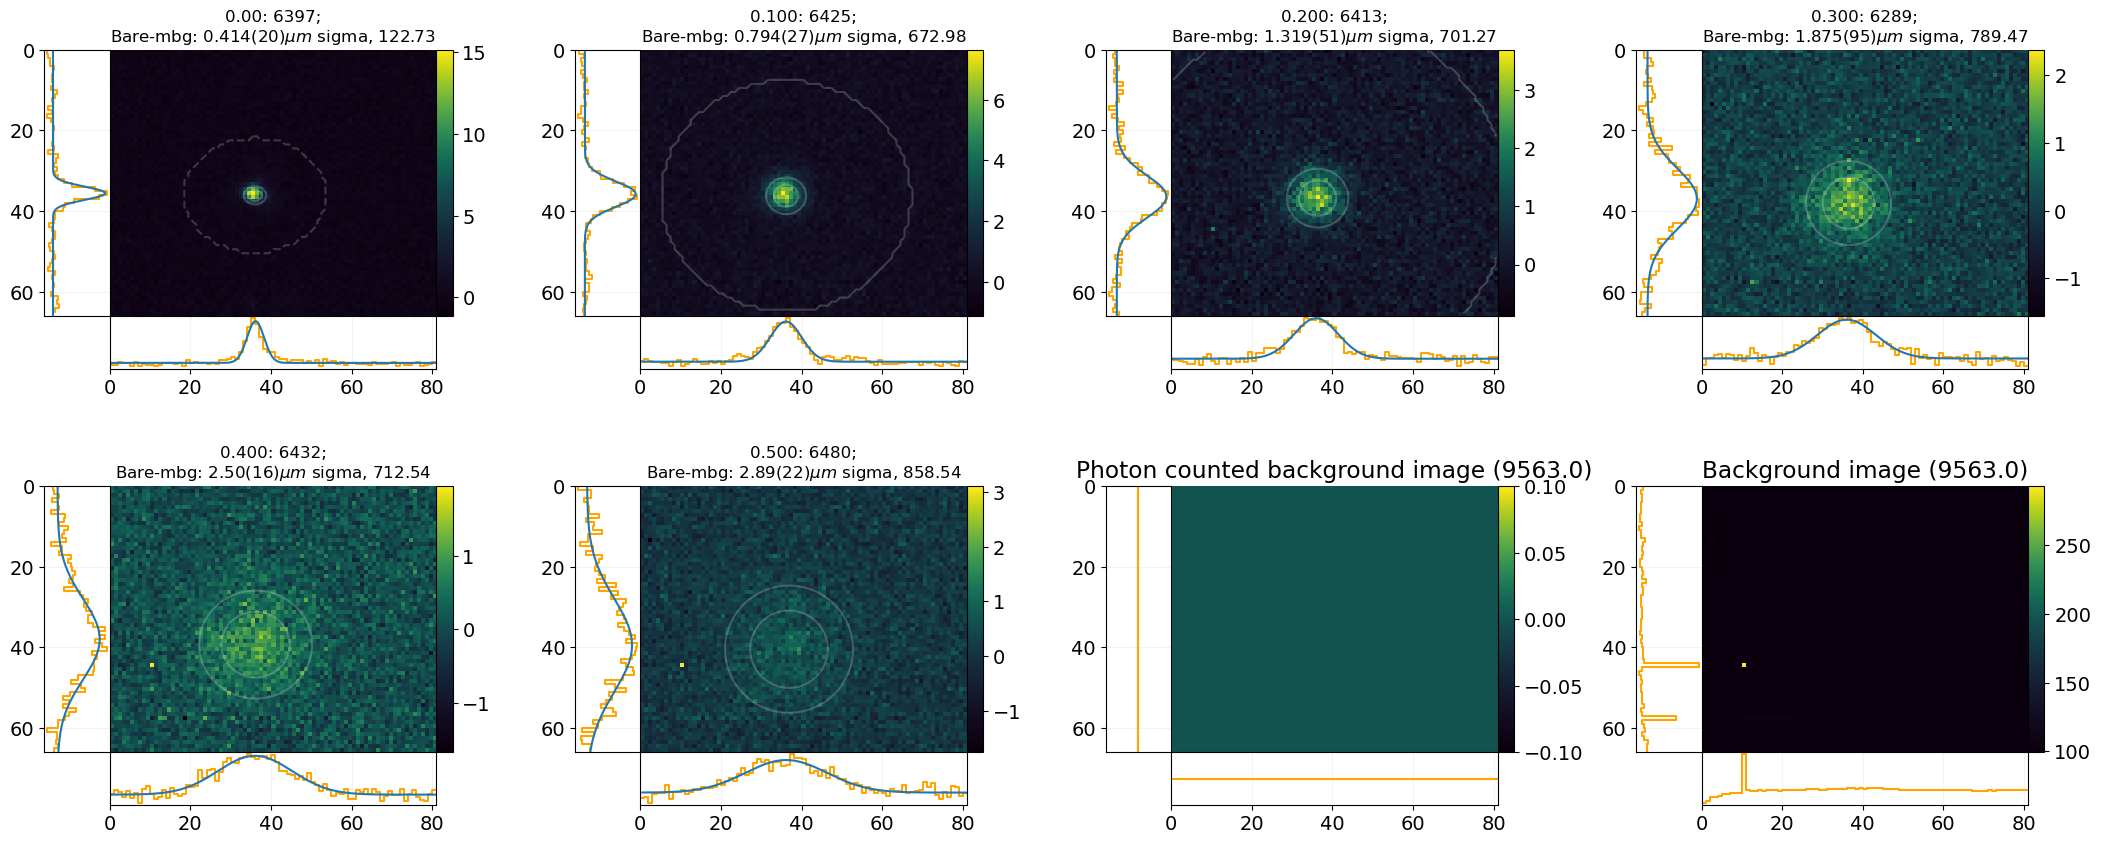

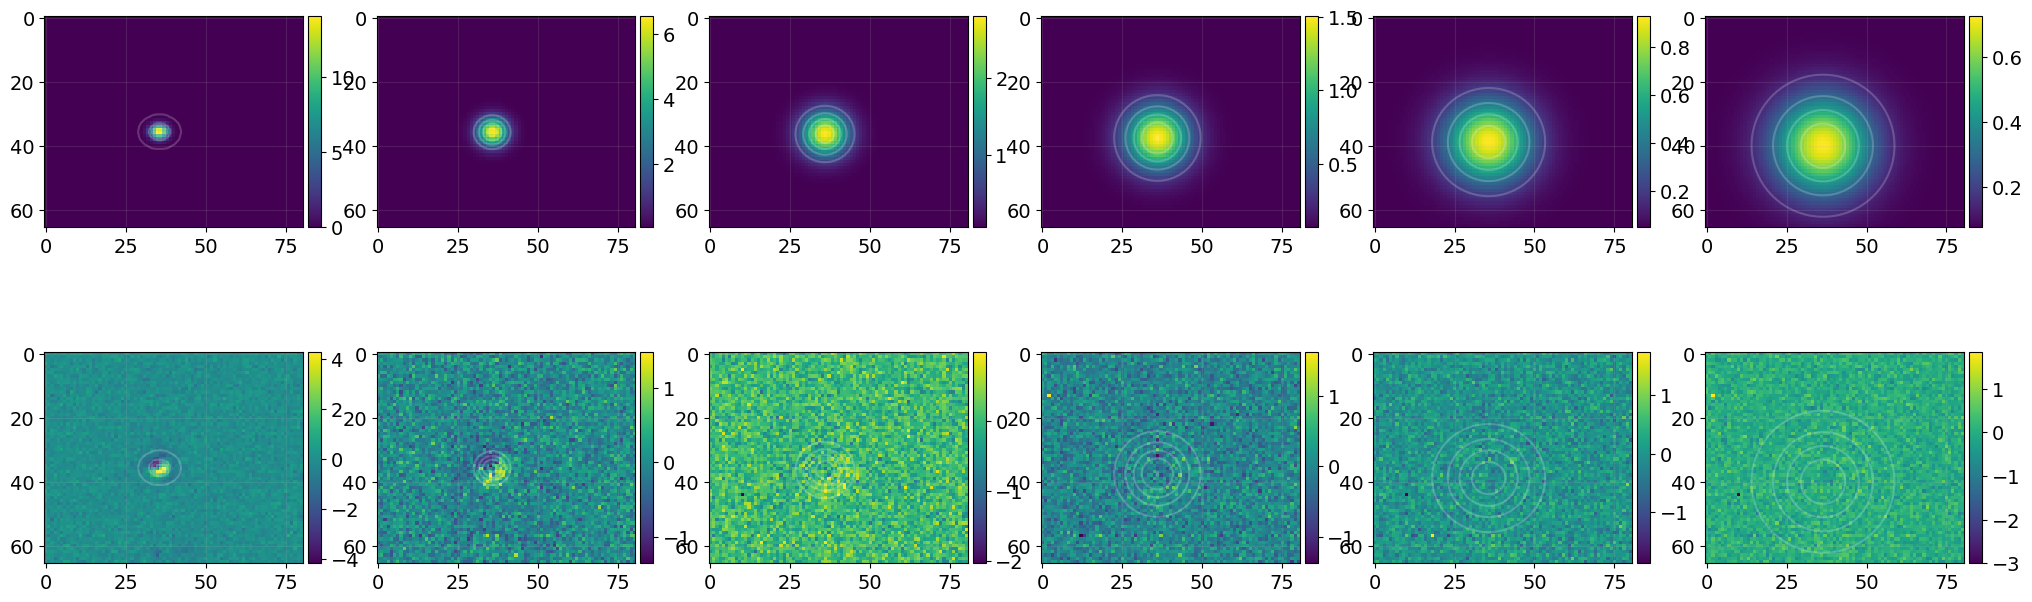

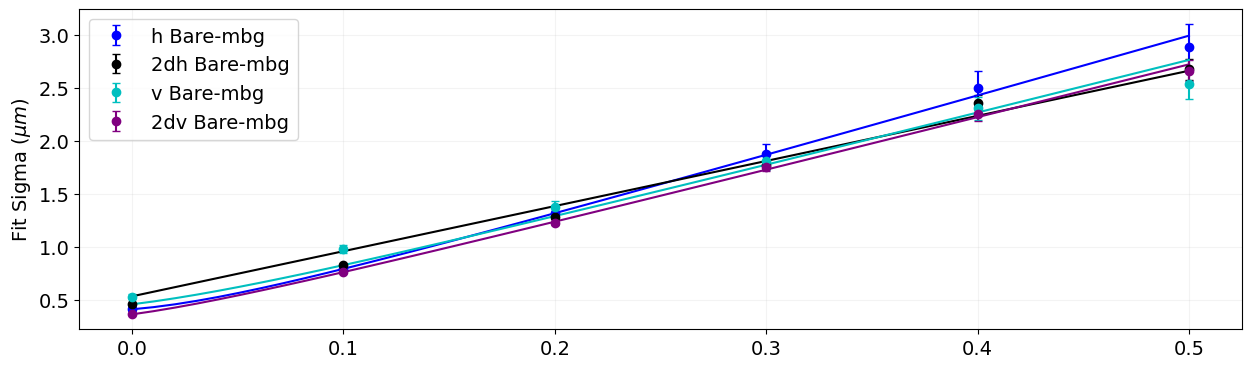

In [7]:
reloadMyModules(21)
resn0 = fsi.freespaceImageAnalysis([9, 10, 11, 12, 13, 14, 15, 16], picsPerRep=2, startPic=1, bgInput=None, onlyThisPic=2, plotSigmas=True, plotCounts=False,
                                  win=pw.PictureWindow(), transferAnalysisOpts=loadOneOption,
                                  extraTferAnalysisArgs = { 'win':pw.PictureWindow(1,-2), 'binningParams':(3,3), 
                                                            'tOptions':[to.ThresholdOptions(histBinSize=75)], 'picsPerRep':2}, 
                                 showTferAnalysisPlots=False, plotFitAmps=False, indvColorRanges=True, calcTemperature=True, guessTemp=0.3e-6);

### File 5: 0.5ms drop time run

Number of Pictures: 20000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 10000;	Exp File Version: 4;
Experiment started at (H:M:S) 9:47:34: on (Y-M-D) 2021-4-13, And ended at 10:44:53: on 2021-4-13
Experiment Notes: what? gah, looks like there's some bad data in there?



### File 6: second data set

Number of Pictures: 20000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 10000;	Exp File Version: 4;
Experiment started at (H:M:S) 12:10:49: on (Y-M-D) 2021-4-13, And ended at 13:8:5: on 2021-4-13
Experiment Notes: still need to finish analyzing the other data set... I actually like the look of this...



### File 7: 3rd data set

Number of Pictures: 20000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 10000;	Exp File Version: 4;
Experiment started at (H:M:S) 13:19:15: on (Y-M-D) 2021-4-13, And ended at 14:16:33: on 2021-4-13
Experiment Notes: okay I think it's looking good, but clearly still very noisy



### File 9: fourth data set

Number of Pictures: 20000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 10000;	Exp File Version: 4;
Experiment started at (H:M:S) 15:28:28: on (Y-M-D) 2021-4-13, And ended at 16:25:45: on 2021-4-13
Experiment Notes: this is after a carrier refresh, continuing to look good, yay!



### File 10: another data set

Number of Pictures: 20000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 10000;	Exp File Version: 4;
Experiment started at (H:M:S) 16:26:7: on (Y-M-D) 2021-4-13, And ended at 17:23:25: on 2021-4-13
Experiment Notes: okay continuing to look good



### File 11: another data set

Number of Pictures: 20000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 10000;	Exp File Version: 4;
Experiment started at (H:M:S) 17:38:4: on (Y-M-D) 2021-4-13, And ended at 18:35:20: on 2021-4-13
Experiment Notes: okay, continuing...



### File 12: moar data

Number of Pictures: 20000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 10000;	Exp File Version: 4;
Experiment started at (H:M:S) 18:52:23: on (Y-M-D) 2021-4-13, And ended at 19:49:40: on 2021-4-13
Experiment Notes: moar



### File 13: moar

Number of Pictures: 20000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 10000;	Exp File Version: 4;
Experiment started at (H:M:S) 21:10:54: on (Y-M-D) 2021-4-13, And ended at 22:8:12: on 2021-4-13
Experiment Notes: moar



### File 14: moar data

Number of Pictures: 20000; Picture Dimensions: 66 x 81
Variations: 1;	Repetitions: 10000;	Exp File Version: 4;
Experiment started at (H:M:S) 22:22:53: on (Y-M-D) 2021-4-13, And ended at 23:20:8: on 2021-4-13
Experiment Notes: moar



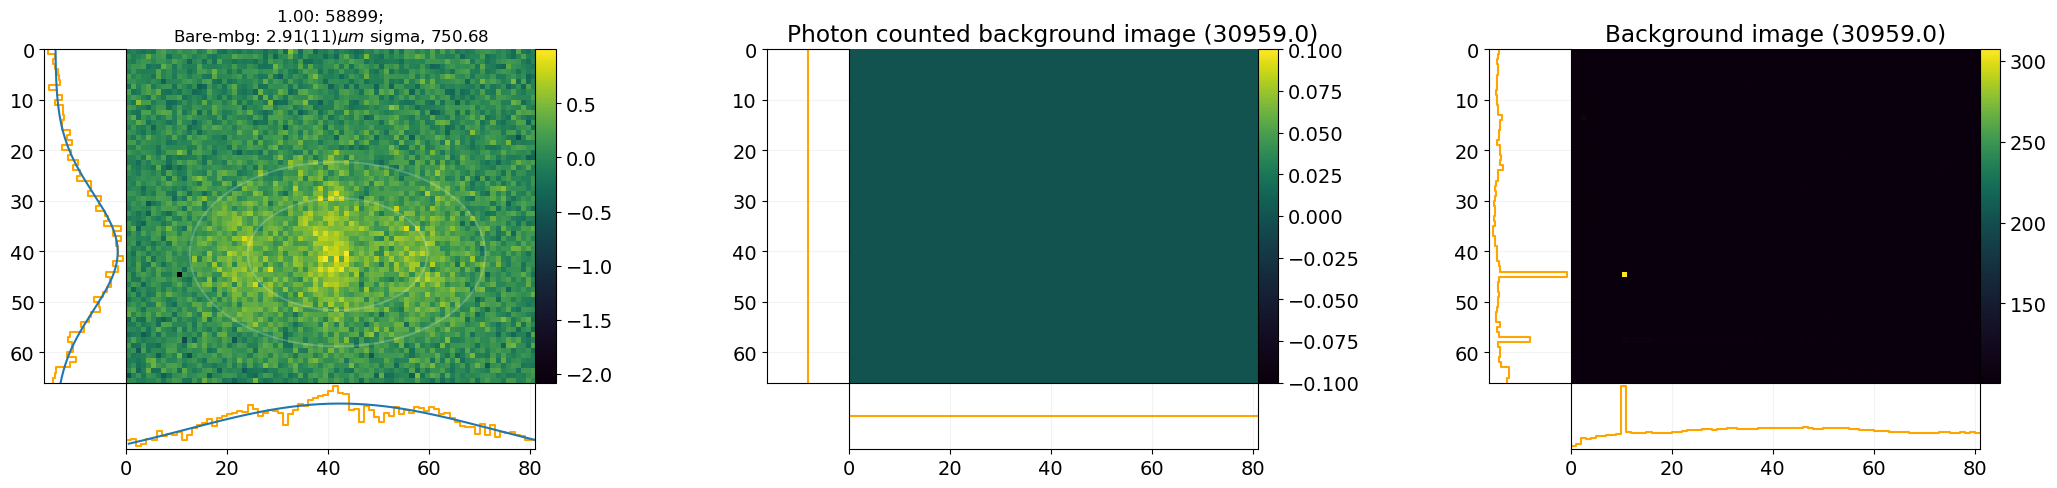

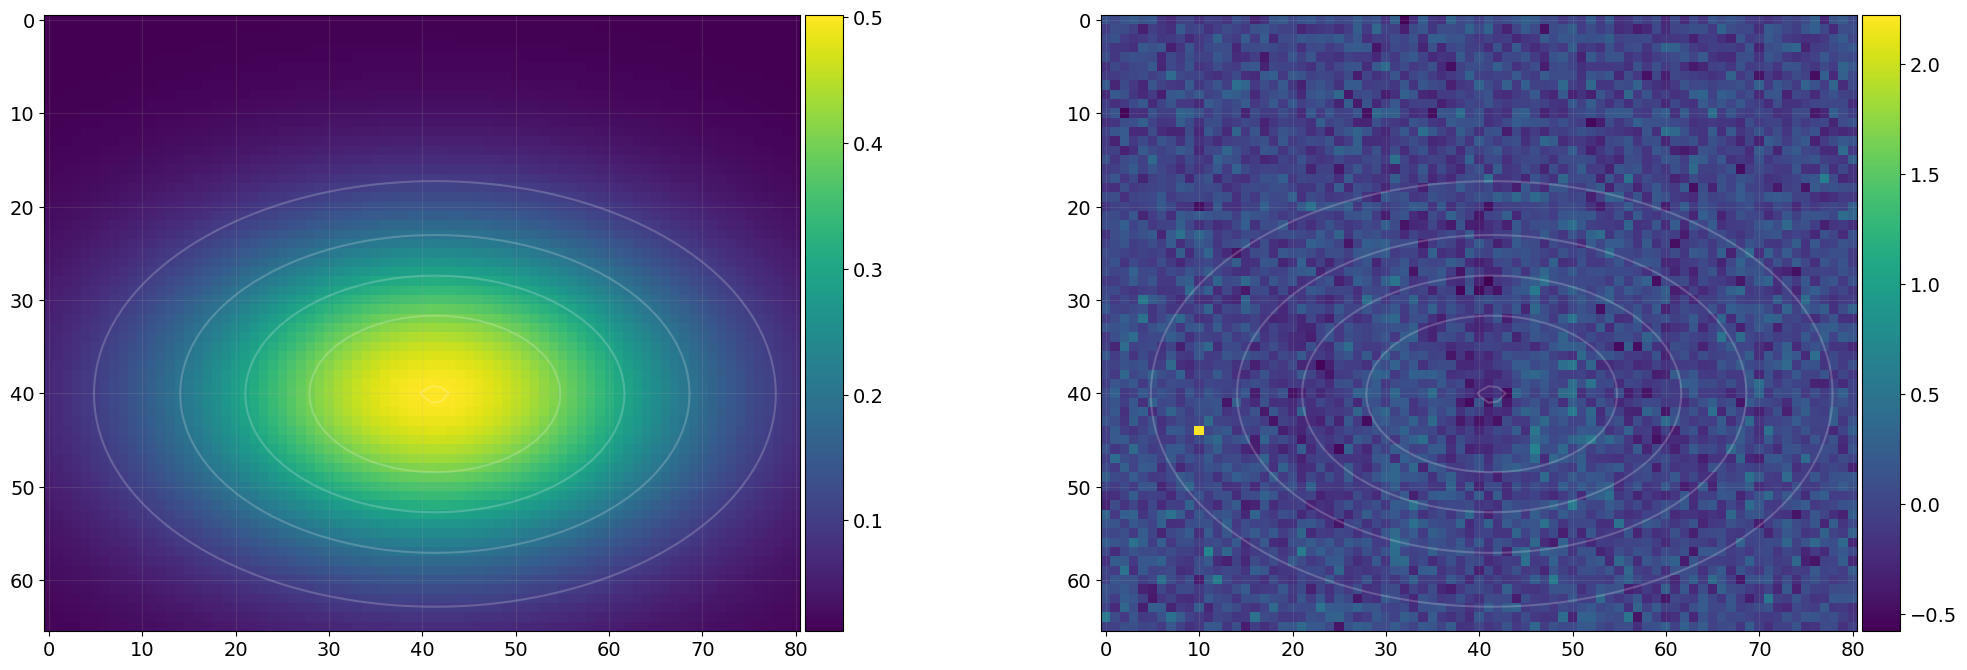

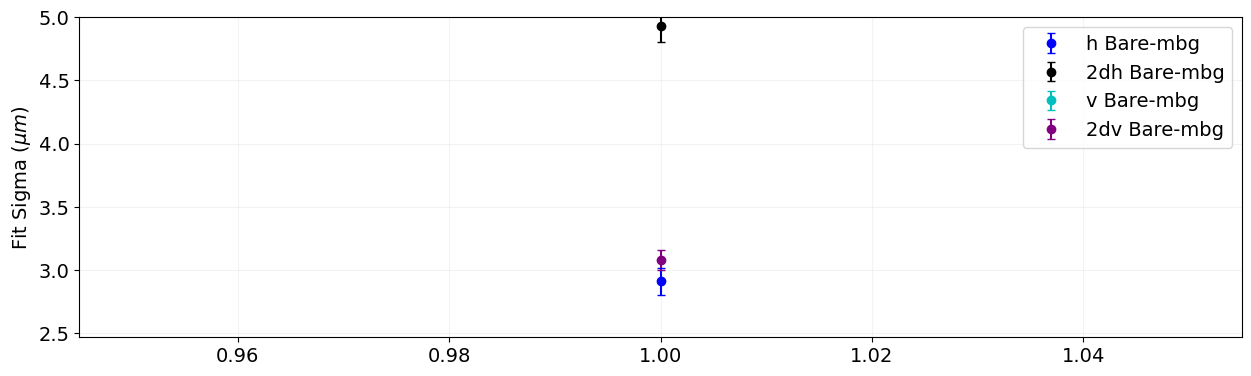

In [8]:
reloadMyModules(13)
resn2 = fsi.freespaceImageAnalysis( [5,6,7,9, 10,11,12,13, 14], picsPerRep=2, startPic=1, bgInput=None, onlyThisPic=2, plotSigmas=True, plotCounts=False,
                                  win=pw.PictureWindow(), transferAnalysisOpts=loadOneOption,
                                  extraTferAnalysisArgs = { 'win':pw.PictureWindow(1,-2), 'binningParams':(3,3), 
                                                            'tOptions':[to.ThresholdOptions(histBinSize=75)], 
                                                            'picsPerRep':2}, showTferAnalysisPlots=False, plotFitAmps=False);

### N=1 expansion

In [9]:
reload(fsi)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<module 'Analysis_Python_Files.FreeSpaceImaging' from '..\\Analysis_Python_Files\\FreeSpaceImaging.py'>

### File 5: time scan with no sep

Number of Pictures: 70000; Picture Dimensions: 66 x 81
Variations: 7;	Repetitions: 5000;	Exp File Version: 4;
Experiment started at (H:M:S) 1:53:46: on (Y-M-D) 2021-4-8, And ended at 5:24:25: on 2021-4-8
Experiment Notes: okay! I think some of that integrated data looks real good. That's real exciting.



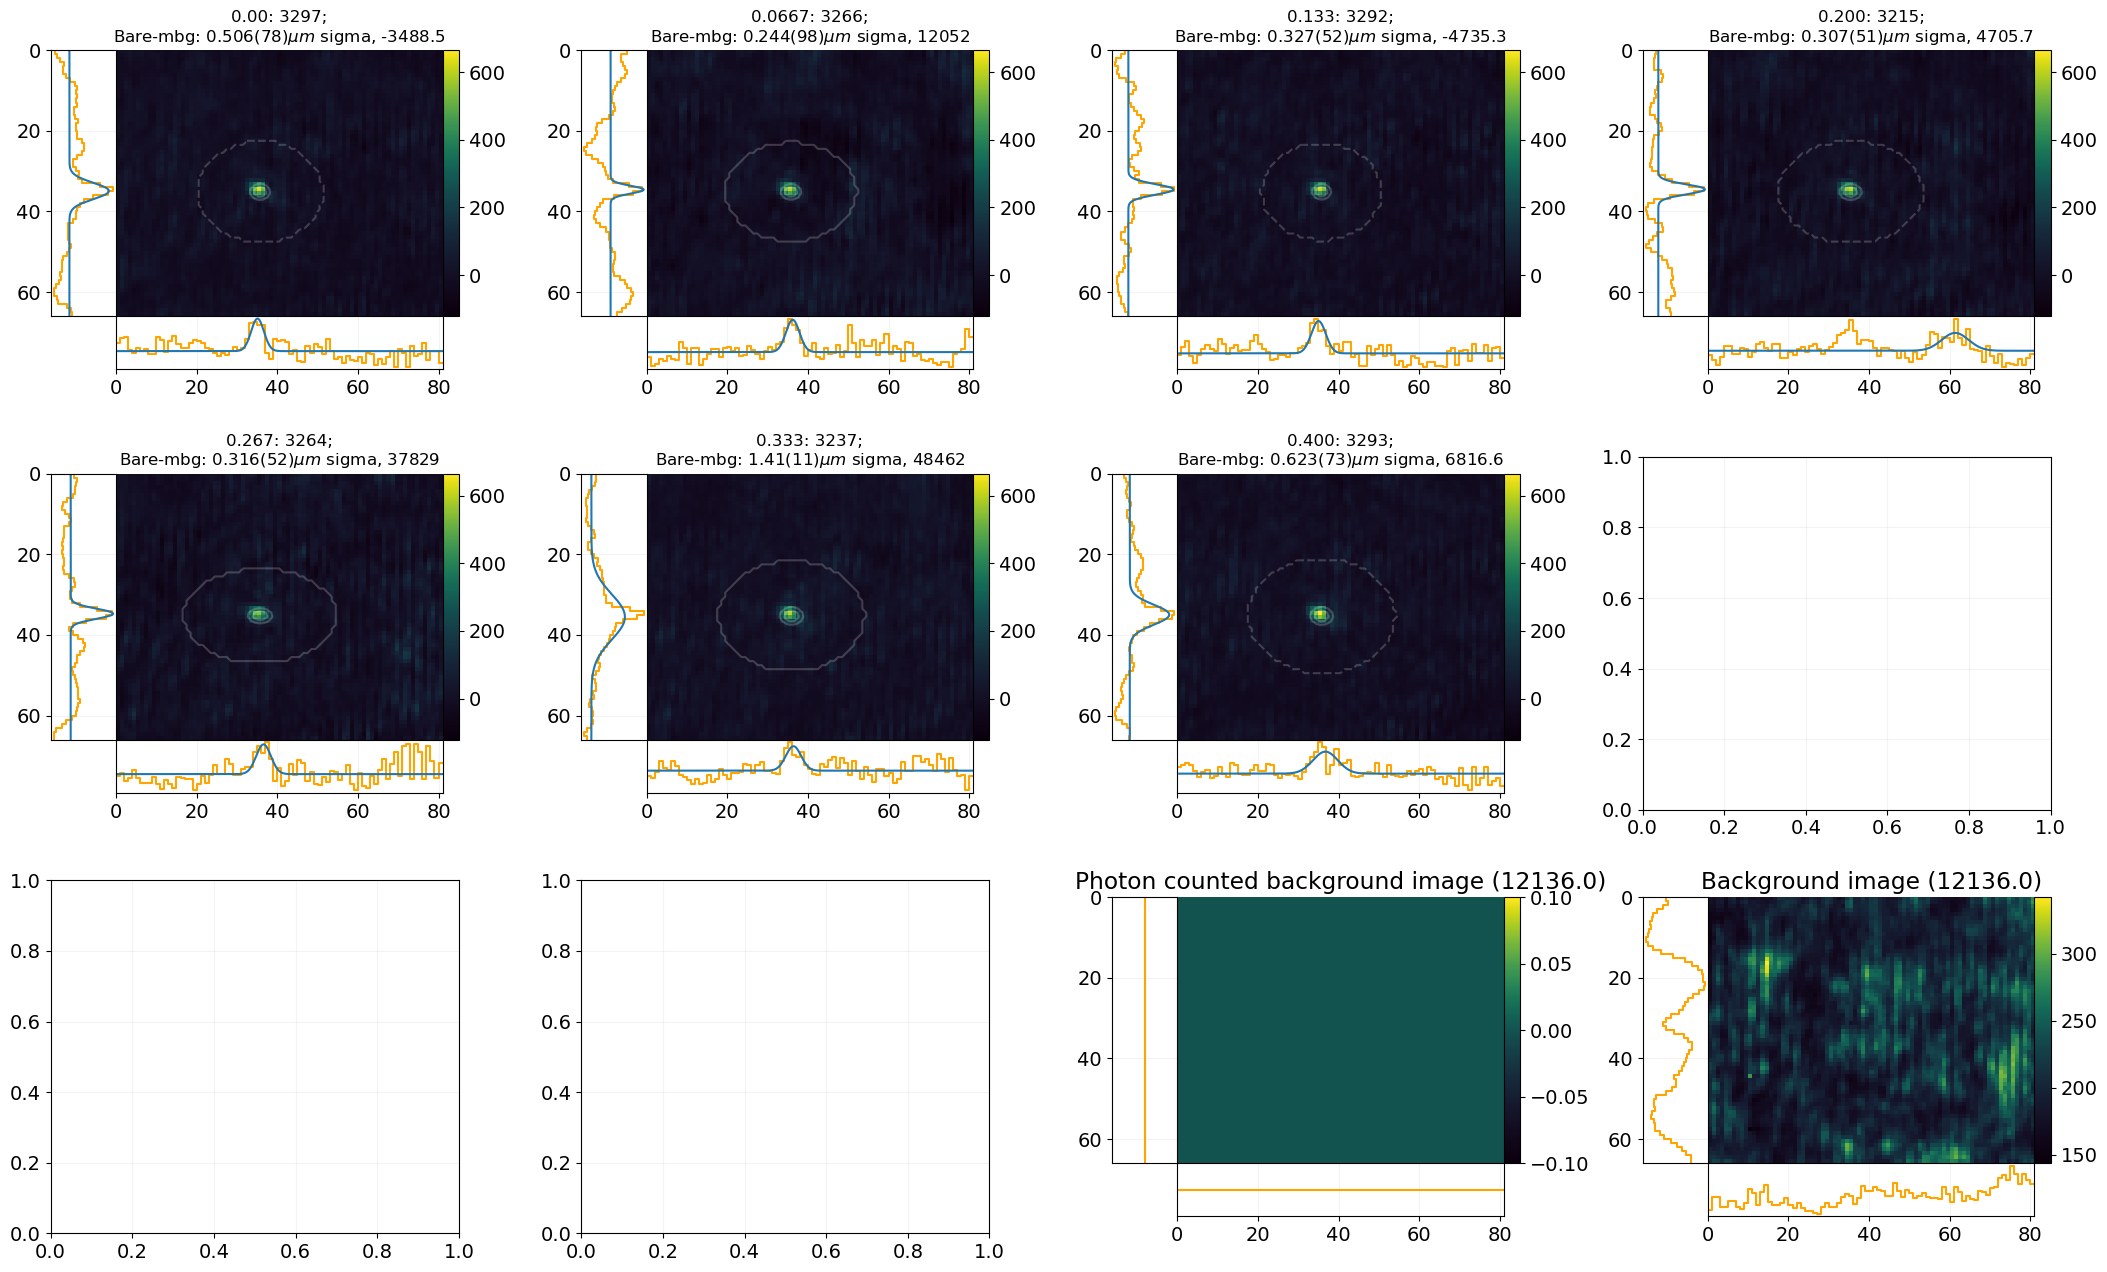

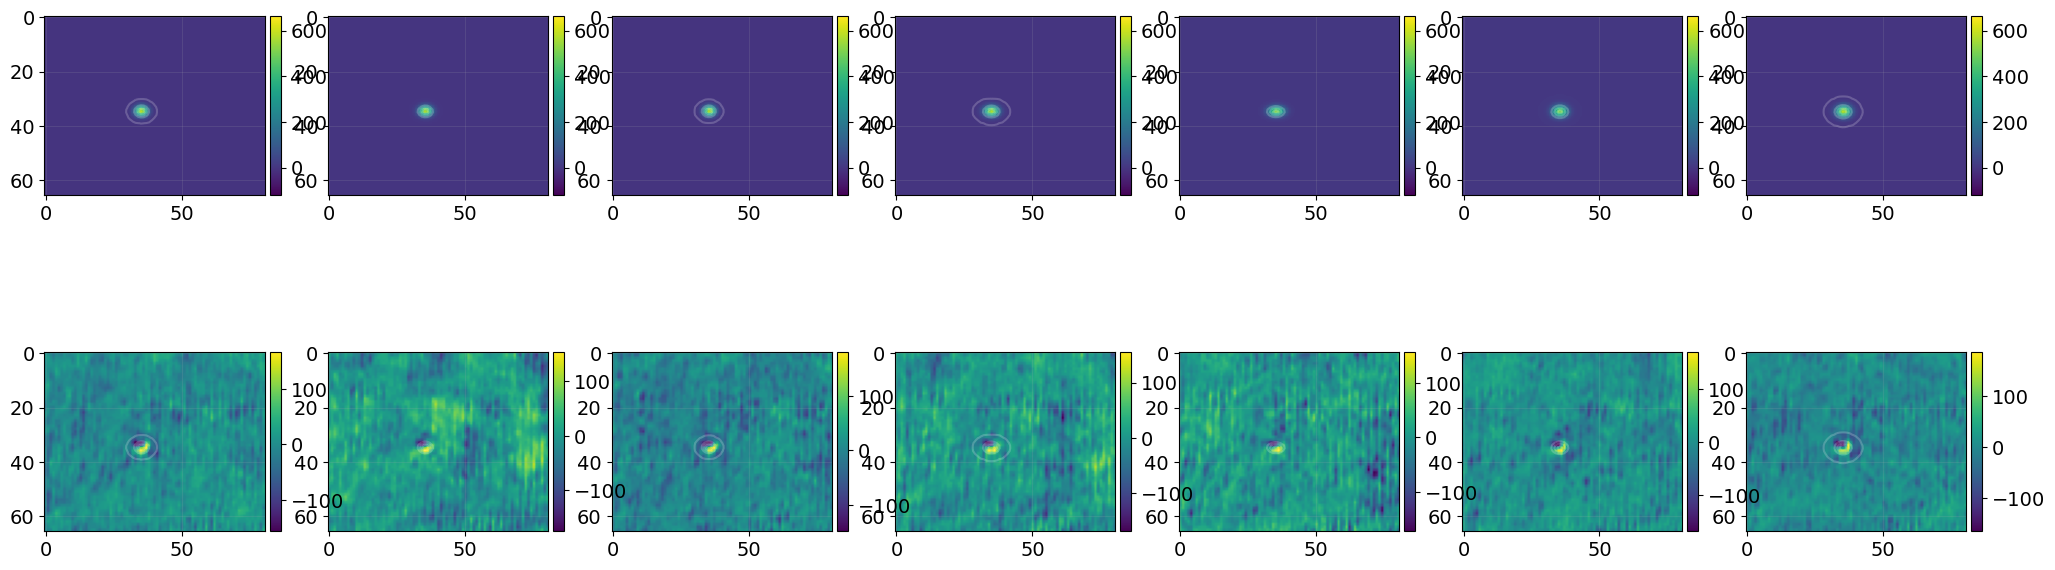

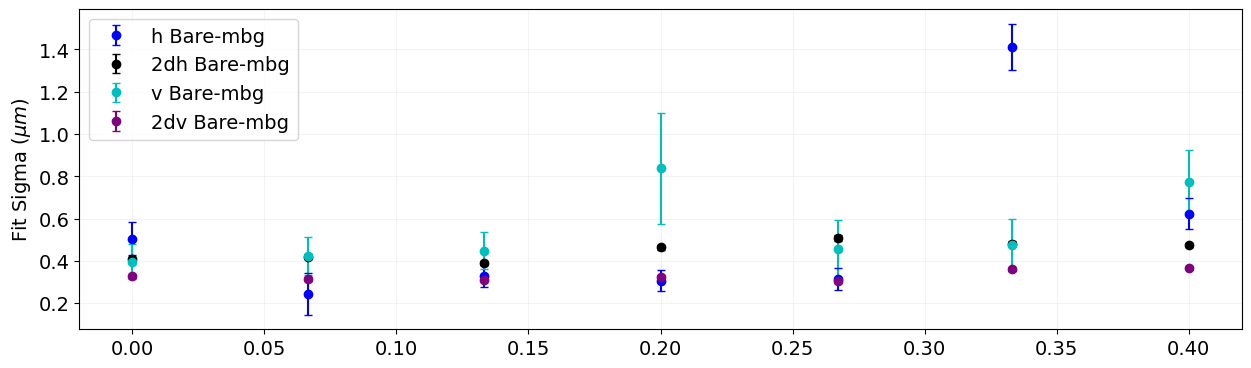

In [10]:
reloadMyModules(8)
fid = 5 # 'C:\\Users\\Mark O. Brown\\Code\\Data-Analysis-Code\\Job_Talk_Preparation\\data_5.h5'
resMainPics = fsi.freespaceImageAnalysis( [fid], 
                                             picsPerRep=2, startPic=0, bgInput=None, onlyThisPic=2, plotSigmas=True, plotCounts=False,
                                  win=pw.PictureWindow(), transferAnalysisOpts=loadOneOption,
                                  extraTferAnalysisArgs = { 'win':pw.PictureWindow(1,-2), 'binningParams':(3,3), 
                                                            'tOptions':[to.ThresholdOptions(histBinSize=75)], 
                                                            'picsPerRep':2, 'useBase':False}, showTferAnalysisPlots=False, plotFitAmps=False, rmHighCounts=False);

### File 5: time scan with no sep

Number of Pictures: 70000; Picture Dimensions: 66 x 81
Variations: 7;	Repetitions: 5000;	Exp File Version: 4;
Experiment started at (H:M:S) 1:53:46: on (Y-M-D) 2021-4-8, And ended at 5:24:25: on 2021-4-8
Experiment Notes: okay! I think some of that integrated data looks real good. That's real exciting.



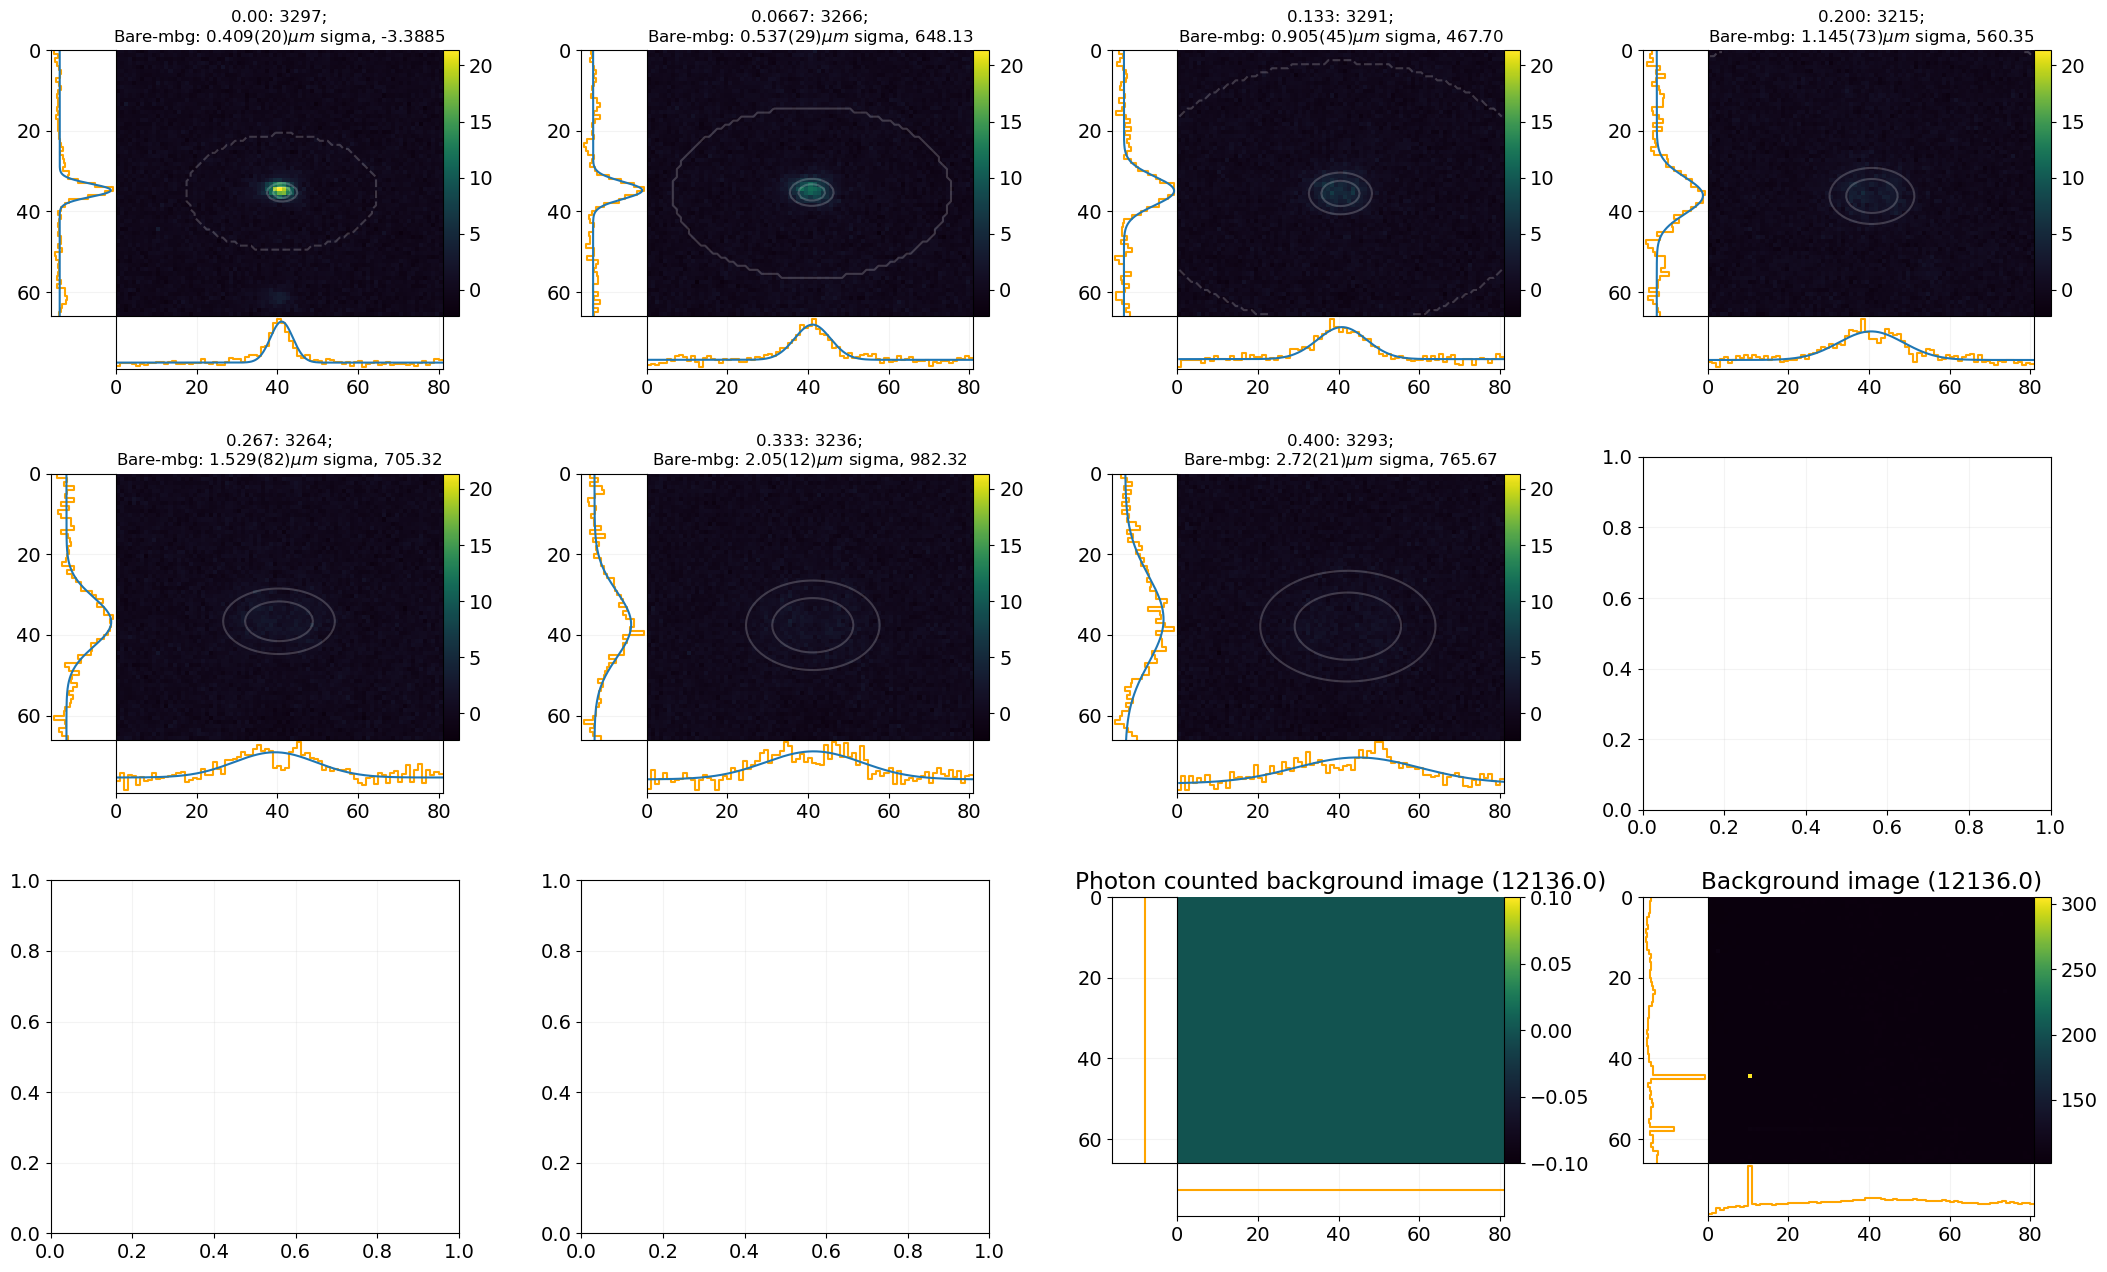

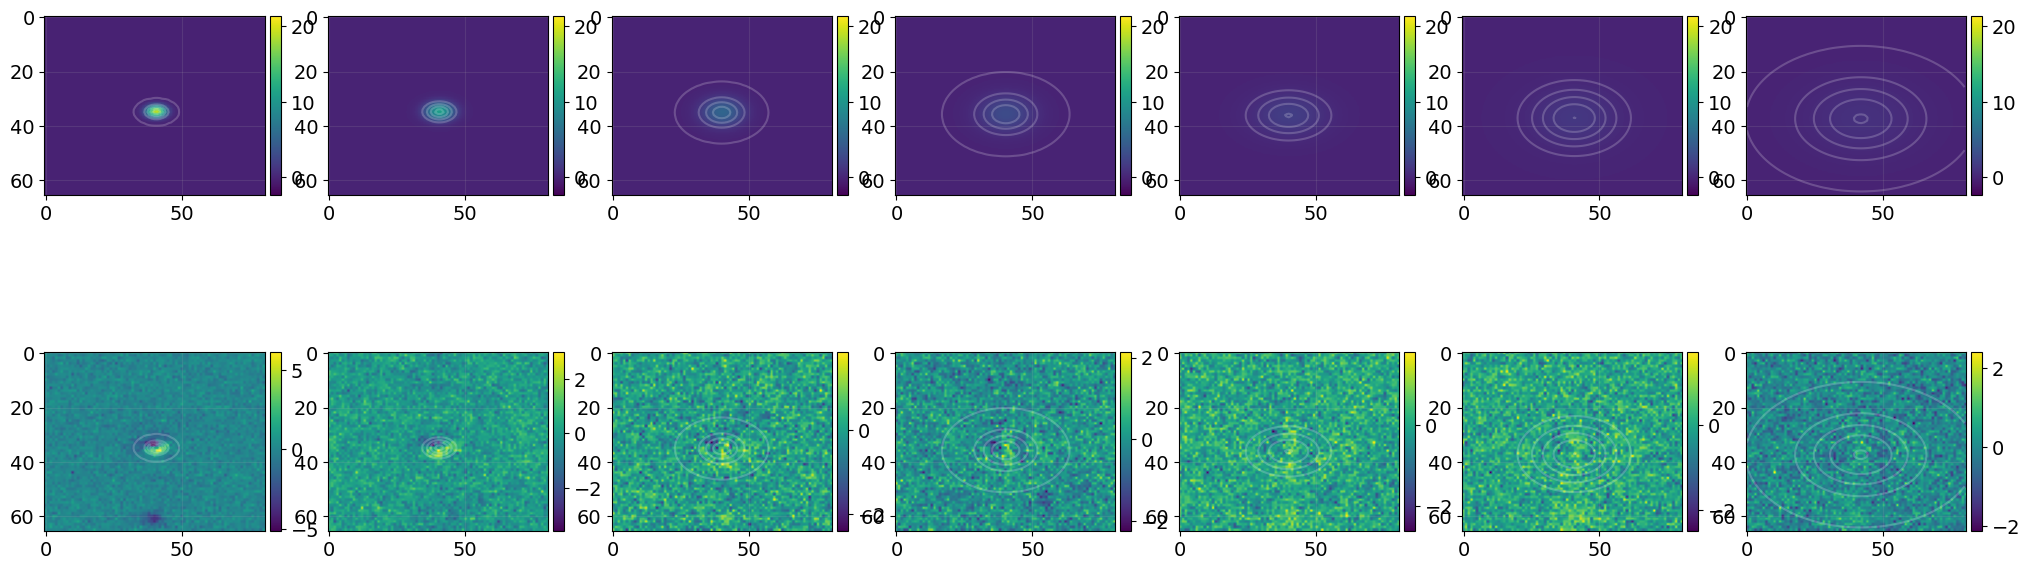

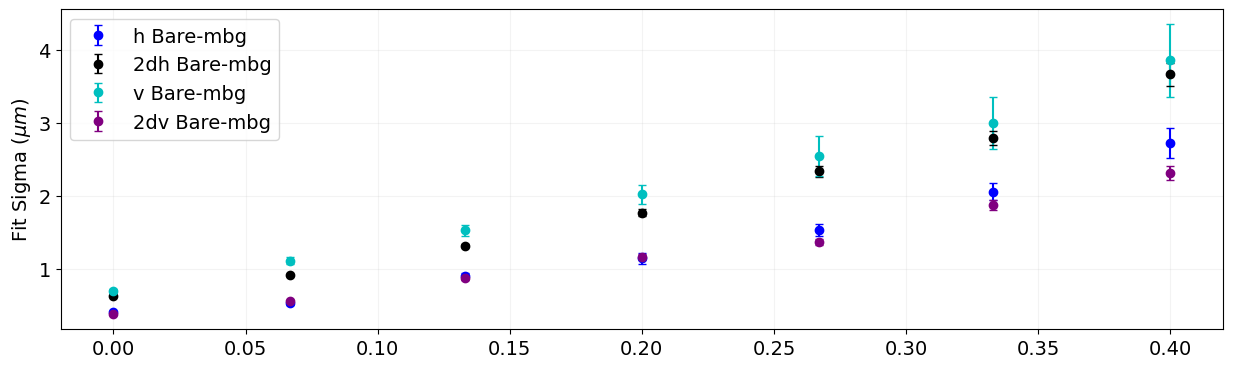

In [11]:

resN1Exp = fsi.freespaceImageAnalysis( [5], picsPerRep=2, startPic=1, bgInput=None, onlyThisPic=2, plotSigmas=True, plotCounts=False,
                                  win=pw.PictureWindow(), transferAnalysisOpts=loadOneOption,
                                  extraTferAnalysisArgs = { 'win':pw.PictureWindow(1,-2), 'binningParams':(3,3), 
                                                            'tOptions':[to.ThresholdOptions(histBinSize=75)], 
                                                            'picsPerRep':2}, showTferAnalysisPlots=False, plotFitAmps=False);

## Deconvolution Testing

In [12]:
fits = [fit[2] for fit in resMainPics['2DFit'].values()]
avgFit = np.mean(fits,0)
print('average fit:', avgFit)

xl = len(list(resMainPics['images'].values())[2][0][0])
yl = len(list(resMainPics['images'].values())[2][0])
x = np.arange(xl)
y = np.arange(yl)
XX, YY = np.meshgrid(x,y)

psf = gaussian_2d.f_notheta((XX,YY), *avgFit).reshape(XX.shape)

average fit: [579.92938059  35.24081162  34.71488533   1.80030183   1.31847554
   1.14774212]


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [14]:
from skimage import restoration

In [16]:
import scipy

Text(0, 0.5, 'Convolution w/ PSF')

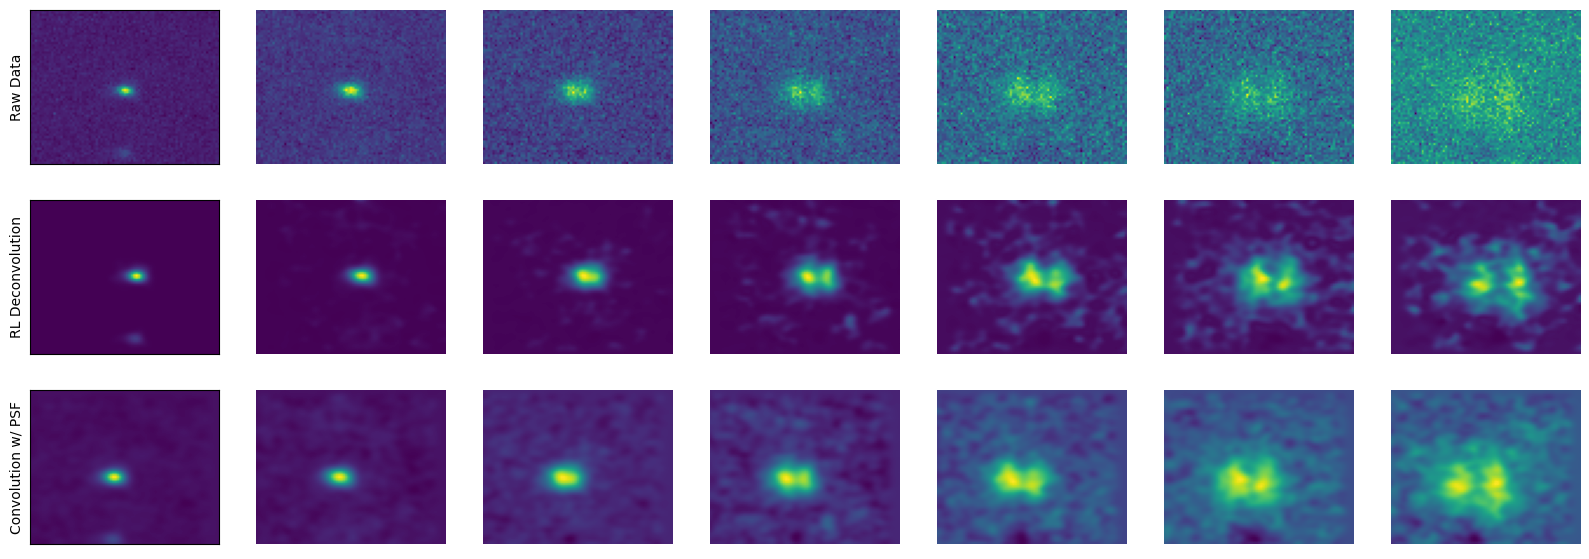

In [17]:
fig, axs = plt.subplots(3,len(resN1Exp['images'].keys()),figsize=(20,7))
for num, key in enumerate(resN1Exp['images'].keys()):
    im = resN1Exp['images'][key][2]
    if num != 0:
        axs[0,num].axis('off')
        axs[1,num].axis('off')
        axs[2,num].axis('off')
    else:
        axs[0,num].set_xticks([])
        axs[1,num].set_xticks([])
        axs[2,num].set_xticks([])
        axs[0,num].set_yticks([])
        axs[1,num].set_yticks([])
        axs[2,num].set_yticks([])
    axs[0,num].imshow(im, cmap='viridis')
    axs[1,num].imshow(restoration.richardson_lucy(im, psf, iterations=2, clip=False, filter_epsilon=1e3), cmap='viridis')    
    axs[2,num].imshow(scipy.signal.convolve2d(im, psf, 'same'))
    
axs[0,0].set_ylabel('Raw Data',fontsize=10)
axs[1,0].set_ylabel('RL Deconvolution',fontsize=10)
axs[2,0].set_ylabel('Convolution w/ PSF',fontsize=10)

## fitting

In [94]:
reload(ah);

### determining Fitting Functions

$$
\psi_n\{x\} = \frac{1}{\sqrt{2^n n!}} \Big(\frac{m\omega}{\pi\hbar}\Big)^{1/4} \exp\Big\{-\frac{m\omega x^2}{2\hbar}\Big\} H_n\Big\{\sqrt{\frac{m\omega}{\hbar}x}\Big\}
$$

In [433]:
import sympy as sp

In [434]:
from sympy.integrals.transforms import fourier_transform

#### n=0

Wavefunction has form
$$
\psi=N\exp\Big\{-\frac{x^2}{2\sigma^2}\Big\}
$$

Normalization:

In [457]:
sigma = sp.Symbol('sigma',real=True)
x,p = sp.symbols('x,p')
w,a,sigma,N,hbar = sp.symbols('w,a,sigma,N,hbar',real=True)
psi = N*sp.exp(-x**2/(2*sigma**2))
display(psi)
area = sp.integrate(psi**2,(x,-sp.oo,sp.oo)).args[0][0]
Nv=sp.simplify(sp.solve(area-1,N)[1])
display(Nv)
display(sp.simplify(psi.subs({N:Nv})))

N*exp(-x**2/(2*sigma**2))

sqrt(1/sigma)/pi**(1/4)

sqrt(1/sigma)*exp(-x**2/(2*sigma**2))/pi**(1/4)

momentum space:

In [458]:
sigmap = sp.Symbol('sigma_p')
phi = sp.simplify(sp.integrate(psi*sp.exp(-1j*x*p/hbar),(x,-sp.oo,sp.oo))).args[0][0]
area = sp.integrate(phi**2,(p,-sp.oo,sp.oo)).args[0][0]
display(phi)
display(area)
Nv = sp.solve(area-1,N)

sqrt(2)*sqrt(pi)*N*sigma*exp(-0.5*p**2*sigma**2/hbar**2)

2.0*pi**(3/2)*N**2*hbar*sigma

In [459]:
sp.nsimplify(phi.subs({N:sp.sqrt(N**2/area), hbar:1, sigma:1/sigmap})**2)

exp(-p**2/sigma_p**2)/(sqrt(pi)*sigma_p)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.9999999999999954


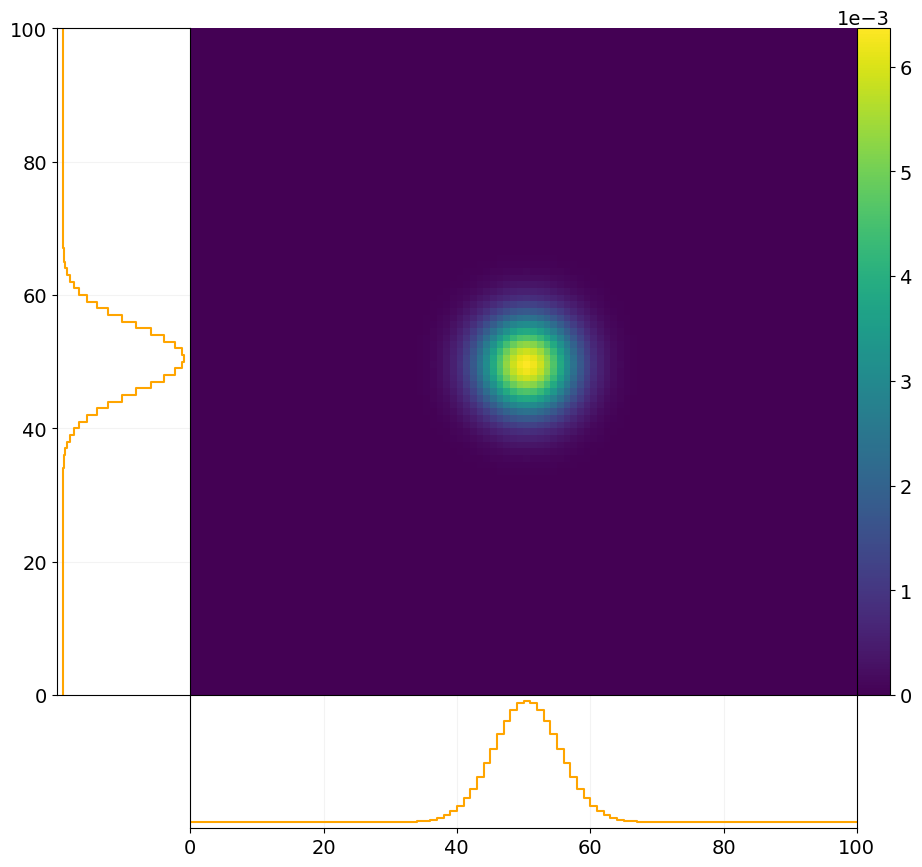

In [859]:
reload(n0State)
x = y = np.arange(100)
XX, YY = np.meshgrid(x,y)
sig = 5
ZZ = n0State.f_notheta((XX,YY),1,50,50,sig,5,0).reshape(XX.shape)
print(sum(ZZ.flatten()))
fig, ax = plt.subplots()
mp.fancyImshow(fig,ax,ZZ);

#### n=1

Wavefunction has form
$$
\psi=Nx\exp\Big\{-\frac{x^2}{2\sigma^2}\Big\}
$$

Normalization:

In [436]:
sigma = sp.Symbol('sigma',real=True)
x,p = sp.symbols('x,p')
w,a,sigma,N,hbar = sp.symbols('w,a,sigma,N,hbar',real=True)
psi = N*x*sp.exp(-x**2/(2*sigma**2))
display(psi)
area = sp.integrate(psi**2,(x,-sp.oo,sp.oo)).args[0][0]
Nv=sp.simplify(sp.solve(area-1,N)[1])
display(sp.simplify(psi.subs({N:Nv})))

N*x*exp(-x**2/(2*sigma**2))

sqrt(2)*x*sqrt(sigma**(-3))*exp(-x**2/(2*sigma**2))/pi**(1/4)

momentum space:

In [437]:
sigmap = sp.Symbol('sigma_p')
phi = sp.simplify(sp.integrate(psi*sp.exp(-1j*x*p/hbar),(x,-sp.oo,sp.oo))).args[0][0]
area = sp.integrate(phi**2,(p,-sp.oo,sp.oo)).args[0][0]
display(phi)
display(area)
Nv = sp.solve(area-1,N)

-1.4142135623731*I*sqrt(pi)*N*p*sigma**3*exp(-0.5*p**2*sigma**2/hbar**2)/hbar

-1.0*pi**(3/2)*N**2*hbar*sigma**3

In [438]:
sp.nsimplify(phi.subs({N:sp.sqrt(N**2/area), hbar:1, sigma:1/sigmap})**2)

2*p**2*exp(-p**2/sigma_p**2)/(sqrt(pi)*sigma_p**3)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.9999999999999978


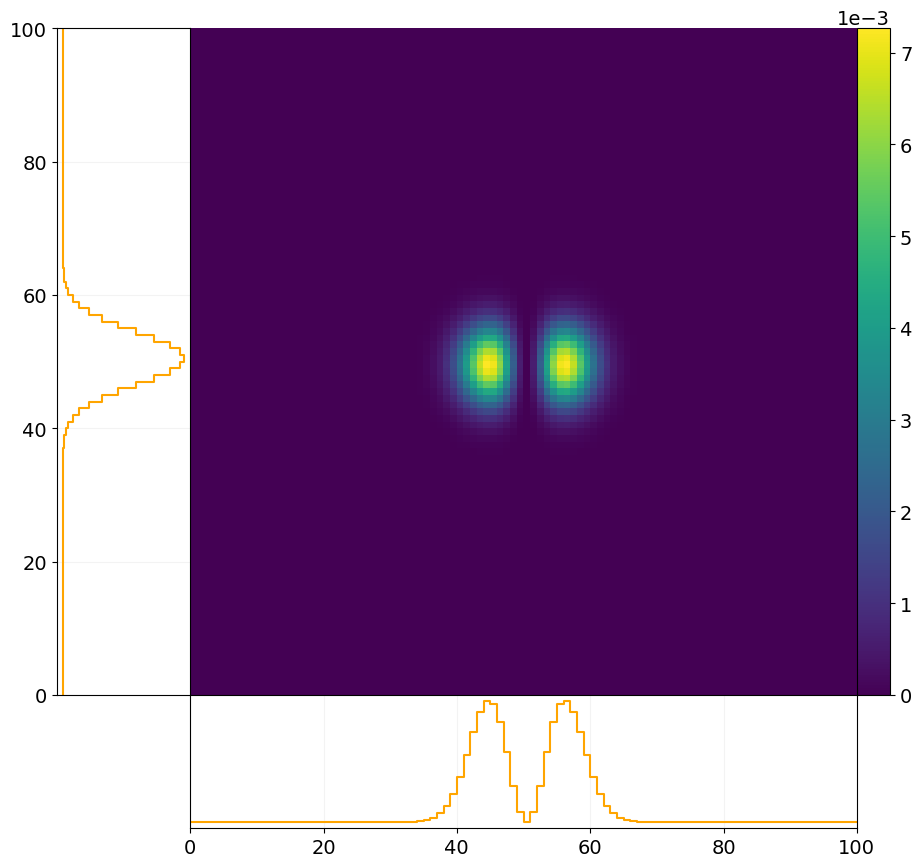

In [862]:
reload(n1State)
x = y = np.arange(100)
XX, YY = np.meshgrid(x,y)
sig = 4
ZZ = n1State.f((XX,YY),1,50,50,sig,sig,0).reshape(XX.shape)
print(sum(ZZ.flatten()))
fig, ax = plt.subplots()
mp.fancyImshow(fig,ax,ZZ);

#### n=2

$$
\psi_n\{x\} = \frac{1}{\sqrt{2^n n!}} \Big(\frac{m\omega}{\pi\hbar}\Big)^{1/4} \exp\Big\{-\frac{m\omega x^2}{2\hbar}\Big\} H_n\Big\{\sqrt{\frac{m\omega}{\hbar}x}\Big\}
$$

Wavefunction has form
$$
\psi=N\Big(\frac{2x^2}{\sigma^2}-1\Big)\exp\Big\{-\frac{x^2}{2\sigma^2}\Big\}
$$

Normalization:

In [478]:
sigma = sp.Symbol('sigma',real=True)
x,p = sp.symbols('x,p')
w,a,sigma,N,hbar = sp.symbols('w,a,sigma,N,hbar',real=True)
psi = N*(2*x**2/sigma**2-1)*sp.exp(-x**2/(2*sigma**2))
display(psi)
area = sp.integrate(psi**2,(x,-sp.oo,sp.oo)).args[0][0]
Nv=sp.simplify(sp.solve(area-1,N)[1])
display(sp.simplify(psi.subs({N:Nv})))

N*(-1 + 2*x**2/sigma**2)*exp(-x**2/(2*sigma**2))

sqrt(2)*(-sigma**2/2 + x**2)*sqrt(1/sigma)*exp(-x**2/(2*sigma**2))/(pi**(1/4)*sigma**2)

momentum space:

In [479]:
sigmap = sp.Symbol('sigma_p')
phi = sp.simplify(sp.integrate(psi*sp.exp(-1j*x*p/hbar),(x,-sp.oo,sp.oo))).args[0][0]
area = sp.integrate(phi**2,(p,-sp.oo,sp.oo)).args[0][0]
display(phi)
display(area)
Nv = sp.solve(area-1,N)

0.5*sqrt(2)*sqrt(pi)*N*sigma*(2.0*hbar**2 - 4.0*p**2*sigma**2)*exp(-0.5*p**2*sigma**2/hbar**2)/hbar**2

4.0*pi**(3/2)*N**2*hbar*sigma

In [480]:
sp.nsimplify(phi.subs({N:sp.sqrt(N**2/area), hbar:1, sigma:1/sigmap})**2)

2*(-p**2/sigma_p**2 + 1/2)**2*exp(-p**2/sigma_p**2)/(sqrt(pi)*sigma_p)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.9999999999999957


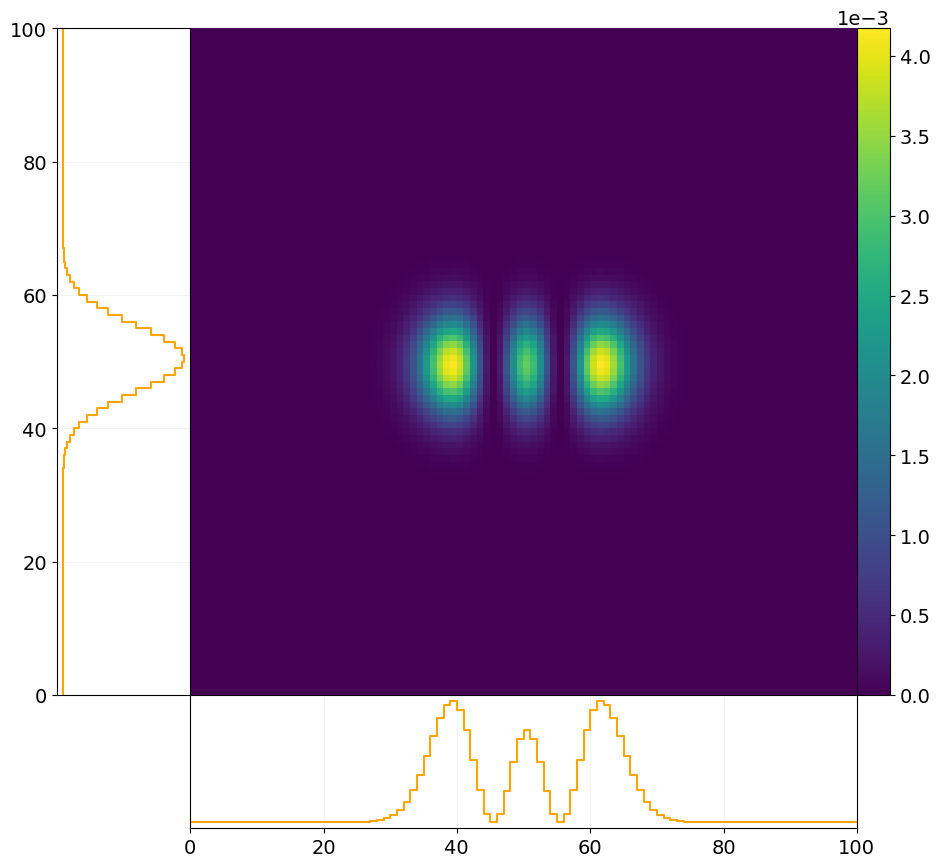

In [857]:
reload(n2State)
x = y = np.arange(100)
XX, YY = np.meshgrid(x,y)
sig = 5
ZZ = n2State.f((XX,YY),1,50,50,sig,sig,0).reshape(XX.shape)
print(sum(ZZ.flatten()))
fig, ax = plt.subplots()
mp.fancyImshow(fig, ax, ZZ);

### Actual Fitting

#### n=0

In [504]:
def n123StateSum(coordinates, x0, y0, a0, a1, a2, wx, wy, offset):
    return (n0State.f_notheta(coordinates, a0, x0, y0, wx, wy, 0) +
            n1State.f(coordinates, a1, x0, y0, wx, wy, 0) +
            n2State.f(coordinates, a2, x0, y0, wx, wy, 0)) + offset

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [702]:
def n123StateSum_Restricted(coordinates, x0, y0, a0, a1, a2, w, offset):
    return (n0State.f_notheta(coordinates, a0, x0, y0, w, w, 0) +
            n1State.f(coordinates, a1, x0, y0, w, w, 0) +
            n2State.f(coordinates, a2, x0, y0, w, w, 0)) + offset

$$
val = x/(x+y+z)\\
\frac{dval}{dx} = \frac{((x+y+z)1-x)}{(x+y+z)^2}=\frac{y+z}{(x+y+z)^2}\\
\frac{dval}{dy} = \frac{(0-x)}{(x+y+z)^2}=\frac{-x}{(x+y+z)^2}
$$

In [584]:
def n123AmpsAndErrs(popt, perr):
    ampSum = popt[2] + popt[3] + popt[4]
    sumErr = np.sqrt(perr[2]**2 + perr[3]**2 + perr[4]**2)
    weights = popt[2]/ampSum, popt[3]/ampSum, popt[4]/ampSum
    def errFunc(v1, v1e, v2, v2e, v3, v3e):
        # v2 and v3 are equivalent, order doesn't matter.
        dfdv1 = (v2+v3)/(v1+v2+v3)**2
        dfdv2 = -v1/(v1+v2+v3)**2
        dfdv3 = dfdv2        
        return np.sqrt((dfdv1*v1e)**2 + (dfdv2*v2e)**2 + (dfdv3*v3e)**2)
    v1, v2, v3 = popt[2:5]
    v1e, v2e, v3e = perr[2:5]
    weightErrs = [errFunc(v1,v1e,v2,v2e,v3,v3e), errFunc(v2,v2e,v1,v1e,v3,v3e),errFunc(v3,v3e,v1,v1e,v2,v2e)]        
    return weights, weightErrs    

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [723]:
weightStrs = [misc.errString(weights[x], weightErrs[x]) for x in [0,1,2]]
print('Raw Sum State Weights:', weightStrs[0], weightStrs[1], weightStrs[2])
print('Raw Sum Fit Sigmas (x,y):', misc.errString(popt_sum[5], perr_sum[5]),misc.errString(popt_sum[6], perr_sum[6]))

Raw Sum State Weights: 0.3338(95) 0.641(11) 0.025(12)
Raw Sum Fit Sigmas (x,y): 10(120) 12.33(54)


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [892]:
def fitAll(image, imageReconstruction, singleFitF_Index, plotFitResults=True):
    x = np.linspace(0, image.shape[1], image.shape[1])
    y = np.linspace(0, image.shape[0], image.shape[0])
    X, Y = np.meshgrid(x, y)
    x0, y0 = 40, 40
    singleFitF = [n0State.f_notheta, n1State.f, n2State.f][singleFitF_Index]
    singleFitWeights = [0,0,0]
    singleFitWeights[singleFitF_Index] = 1
    
    order = ['Raw Data \nState-Sum', 'Raw Data \nRestricted State-Sum', 'Raw Data \nSingle State',
            'Reconstructed Data \nState-Sum', 'Reconstructed Data \nRestricted State-Sum', 'Reconstructed Data \nSingle State', 'Average Value']
    allWeights, allWeightErrs, allSigmas, allSigmaErrs, fitImages = [[None for _ in range(7)] for _ in range(5)]
    
    popt, pcov = opt.curve_fit(n123StateSum, (X, Y), image.flatten(), p0=[x0, y0, 0, 0.1, 0, 10, 10, 0])
    perr = np.sqrt(np.diag(pcov))
    weights, weightErrs = n123AmpsAndErrs(popt, perr)
    for dlist, data in zip([allWeights, allWeightErrs, allSigmas, allSigmaErrs, fitImages], 
                           [weights, weightErrs,[popt[5], popt[6]],[perr[5], perr[6]], n123StateSum((X,Y), *popt).reshape(X.shape)]):
        dlist[0] = data
    
    popt, pcov = opt.curve_fit(n123StateSum_Restricted, (X, Y), image.flatten(), p0=[x0, y0, 0, 0.1, 0, 10, 0])
    perr = np.sqrt(np.diag(pcov))
    weights, weightErrs = n123AmpsAndErrs(popt, perr)
    for dlist, data in zip([allWeights, allWeightErrs, allSigmas, allSigmaErrs, fitImages], 
                           [weights, weightErrs, [popt[5], popt[5]],[perr[5], perr[5]], n123StateSum_Restricted((X,Y), *popt).reshape(X.shape)]):
        dlist[1] = data
        
    popt, pcov = opt.curve_fit(singleFitF, (X, Y), image.flatten(), p0=[1, x0, y0, 10, 10, 0])
    perr = np.sqrt(np.diag(pcov))
    for dlist, data in zip([allWeights, allWeightErrs, allSigmas, allSigmaErrs, fitImages], 
                           [singleFitWeights, [0,0,0], [popt[3], popt[4]],[perr[3], perr[4]], singleFitF((X,Y), *popt).reshape(X.shape)]):
        dlist[2] = data

    popt, pcov = opt.curve_fit(n123StateSum, (X, Y), imageReconstruction.flatten(), p0=[x0, y0, 0, 0.1, 0, 10, 10, 0])
    perr = np.sqrt(np.diag(pcov))
    weights, weightErrs = n123AmpsAndErrs(popt, perr)
    for dlist, data in zip([allWeights, allWeightErrs, allSigmas, allSigmaErrs, fitImages], 
                           [weights, weightErrs,[popt[5], popt[6]],[perr[5], perr[6]], n123StateSum((X,Y), *popt).reshape(X.shape)]):
        dlist[3] = data
    
    popt, pcov = opt.curve_fit(n123StateSum_Restricted, (X, Y), imageReconstruction.flatten(), p0=[x0, y0, 0, 0.1, 0, 10, 0])
    perr = np.sqrt(np.diag(pcov))
    weights, weightErrs = n123AmpsAndErrs(popt, perr)
    for dlist, data in zip([allWeights, allWeightErrs, allSigmas, allSigmaErrs, fitImages], 
                           [weights, weightErrs, [popt[5], popt[5]],[perr[5], perr[5]], n123StateSum_Restricted((X,Y), *popt).reshape(X.shape)]):
        dlist[4] = data
        
    popt, pcov = opt.curve_fit(singleFitF, (X, Y), imageReconstruction.flatten(), p0=[1, x0, y0, 10, 10, 0])
    perr = np.sqrt(np.diag(pcov))
    for dlist, data in zip([allWeights, allWeightErrs, allSigmas, allSigmaErrs, fitImages], 
                           [singleFitWeights, [0,0,0], [popt[3], popt[4]],[perr[3], perr[4]], singleFitF((X,Y), *popt).reshape(X.shape)]):
        dlist[5] = data
    
    allWeights[-1] = np.array([0,0,0],dtype=float)
    for num, weights in enumerate(allWeights[:-1]):
        if num not in [2,5]:
            allWeights[-1] += np.array(weights)
    allWeights[-1] /= 4
    
    allWeightErrs[-1] = np.array([0,0,0],dtype=float)
    for num, weightErrs in enumerate(allWeightErrs[:-1]):
        if num not in [2,5]:
            allWeightErrs[-1] += np.array(weightErrs)**2
    allWeightErrs[-1] = np.sqrt(allWeightErrs[-1])/4
    
    allSigmas[-1] = np.array([0,0],dtype=float)
    for num, sigmas in enumerate(allSigmas[:-1]):
        allSigmas[-1] += np.array(sigmas)
    allSigmas[-1] /= 6
    
    allSigmaErrs[-1] = np.array([0,0],dtype=float)
    for num, sigmaErrs in enumerate(allSigmaErrs[:-1]):
        allSigmaErrs[-1] += np.array(sigmaErrs)**2
    allSigmaErrs[-1] = np.sqrt(allSigmaErrs[-1])/6
    
    if show:
        fig, axs = plt.subplots(3,6, figsize=(15,5))
        for num, (name, origImage, fitImage) in enumerate(zip(order, [image, image, image, imageReconstruction,imageReconstruction,imageReconstruction],
                                        fitImages)):
            _,_,hax,_,_,_,_,_,_ = mp.fancyImshow(fig, axs[0,num], origImage,ticklabels=False);
            if num==0:
                hax.set_ylabel('Raw/Reconstructed\nData',fontsize=12)
            axs[0,num].set_title(name, fontsize=12)
            _,_,hax,_,_,_,_,_,_ = mp.fancyImshow(fig, axs[1,num], fitImage,ticklabels=False);
            if num==0:
                hax.set_ylabel('Fit',fontsize=12)
            _,_,hax,_,_,_,_,_,_ = mp.fancyImshow(fig, axs[2,num], origImage-fitImage,ticklabels=False);    
            if num==0:
                hax.set_ylabel('Residuals',fontsize=12)
    return order, allWeights, allWeightErrs, allSigmas, allSigmaErrs, images 

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [893]:
df = pd.DataFrame()

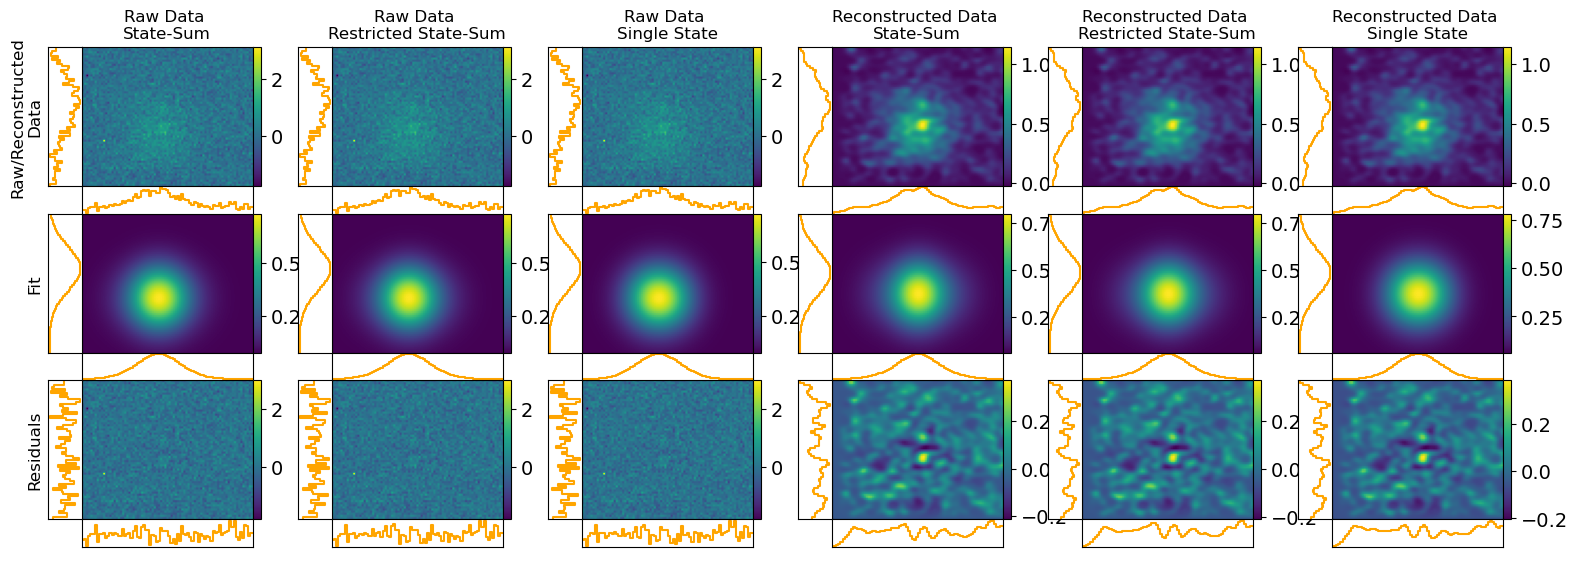

In [895]:
order, allWeights, allWeightErrs, allSigmas, allSigmaErrs, images  = fitAll(n0Image, n0Reconstruction, 0);
df['Sum Weights N=0'] = [[misc.errString(weight,err) for weight, err in zip(weights, errs)] if weights is not None else None for weights, errs in zip(allWeights, allWeightErrs)]
df['Sigmas (x,y) N=0'] = [[misc.errString(weight,err) for weight, err in zip(weights, errs)] if weights is not None else None for weights, errs in zip(allSigmas, allSigmaErrs)]
df.index = order


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



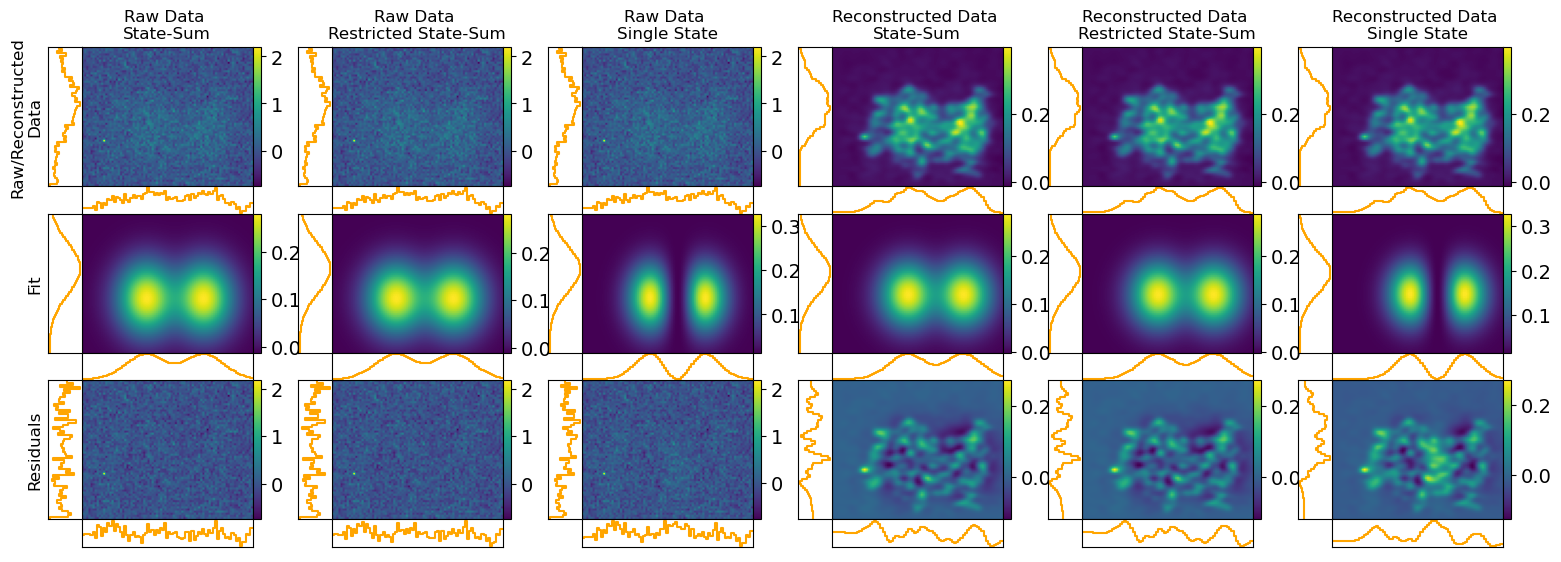

In [896]:
order, allWeights, allWeightErrs, allSigmas, allSigmaErrs, images  = fitAll(n1Image, n1Reconstruction, 1);
df['Sum Weights N=1'] = [[misc.errString(weight,err) for weight, err in zip(weights, errs)] if weights is not None else None for weights, errs in zip(allWeights, allWeightErrs)]
df['Sigmas (x,y) N=1'] = [[misc.errString(weight,err) for weight, err in zip(weights, errs)] if weights is not None else None for weights, errs in zip(allSigmas, allSigmaErrs)]
df.index = order


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



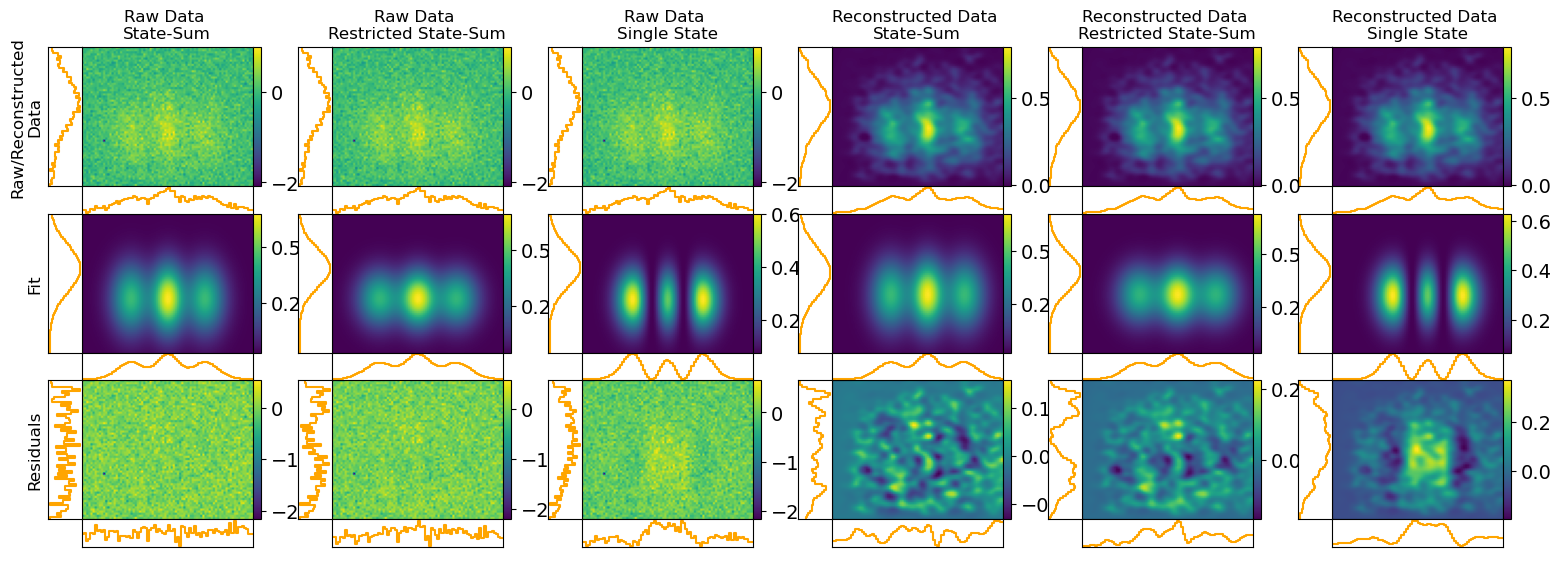

In [897]:
order, allWeights, allWeightErrs, allSigmas, allSigmaErrs, images  = fitAll(n2Image, n2Reconstruction, 2);
df['Sum Weights N=2'] = [[misc.errString(weight,err) for weight, err in zip(weights, errs)] if weights is not None else None for weights, errs in zip(allWeights, allWeightErrs)]
df['Sigmas (x,y) N=2'] = [[misc.errString(weight,err) for weight, err in zip(weights, errs)] if weights is not None else None for weights, errs in zip(allSigmas, allSigmaErrs)]
df.index = order

In [852]:
df

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Sum Weights N=0  \
Raw Data State-Sum                           [0.97(41), 0.00(42), 0.033(45)]   
Raw Data Restricted State-Sum              [0.957(61), 0.000(49), 0.043(40)]   
Raw Data Single State                            [1.00(0), 0.00(0), 0.00(0)]   
Reconstructed Data State-Sum              [0.922(28), 0.000(29), 0.0782(82)]   
Reconstructed Data Restricted State-Sum  [0.926(11), 0.0000(91), 0.0735(76)]   
Reconstructed Data Single State                  [1.00(0), 0.00(0), 0.00(0)]   
Average Value                                [0.94(10), 0.00(11), 0.057(15)]   

                                                 Sigmas (x,y) N=0  \
Raw Data State-Sum                          [10.6(49), 10.70(41)]   
Raw Data Restricted State-Sum              [10.58(41), 10.58(41)]   
Raw Data Single State                      [10.70(40), 10.64(40)]   
Reconstructed Data State-Sum              [10.42(38), 10.773(82)]   
Reconstructed Data Restricted State-Sum  [10.469(80), 10.469(80)]   
Reconstructed Data Single State          [10.699(80), 10.644(79)]   
Average Value                              [10.57(82), 10.63(12)]   

                                                            Sum Weights N=1  \
Raw Data State-Sum                                  [0.4(83), 0(10), 0(13)]   
Raw Data Restricted State-Sum             [0.393(46), 0.607(52), 0.000(53)]   
Raw Data Single State                           [0.00(0), 1.00(0), 0.00(0)]   
Reconstructed Data State-Sum                          [0(11), 0(15), 0(18)]   
Reconstructed Data Restricted State-Sum  [0.3338(95), 0.641(11), 0.025(12)]   
Reconstructed Data Single State                 [0.00(0), 1.00(0), 0.00(0)]   
Average Value                                   [0.4(35), 0.6(45), 0.0(56)]   

                                                 Sigmas (x,y) N=1  \
Raw Data State-Sum                           [10(120), 12.33(54)]   
Raw Data Restricted State-Sum              [11.79(50), 11.79(50)]   
Raw Data Single State                       [9.38(17), 11.03(50)]   
Reconstructed Data State-Sum                [10(160), 10.780(96)]   
Reconstructed Data Restricted State-Sum  [10.788(95), 10.788(95)]   
Reconstructed Data Single State            [9.296(44), 10.02(11)]   
Average Value                                 [11(33), 11.12(15)]   

                                                              Sum Weights N=2  \
Raw Data State-Sum                          [0.374(14), 0.121(17), 0.505(16)]   
Raw Data Restricted State-Sum               [0.399(15), 0.153(18), 0.448(16)]   
Raw Data Single State                             [0.00(0), 0.00(0), 1.00(0)]   
Reconstructed Data State-Sum             [0.3791(29), 0.1294(34), 0.4915(32)]   
Reconstructed Data Restricted State-Sum  [0.4060(37), 0.1577(43), 0.4363(39)]   
Reconstructed Data Single State                   [0.00(0), 0.00(0), 1.00(0)]   
Average Value                            [0.3896(53), 0.1404(63), 0.4701(58)]   

                                                Sigmas (x,y) N=2  
Raw Data State-Sum                         [8.62(11), 11.37(26)]  
Raw Data Restricted State-Sum               [9.23(13), 9.23(13)]  
Raw Data Single State                      [7.536(60), 9.59(29)]  
Reconstructed Data State-Sum             [8.643(23), 11.308(53)]  
Reconstructed Data Restricted State-Sum   [9.244(32), 9.244(32)]  
Reconstructed Data Single State            [7.500(27), 9.46(13)]  
Average Value                            [8.463(31), 10.033(73)]

## Same Time Figure

In [931]:
n0Image = resn0['images']['0.500'][2]
n1Image = resn1_2['images']['1.00'][2]
n2Image = resn2['images']['1.00'][2]

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0.5, 0.92, 'Deconvolved Data')

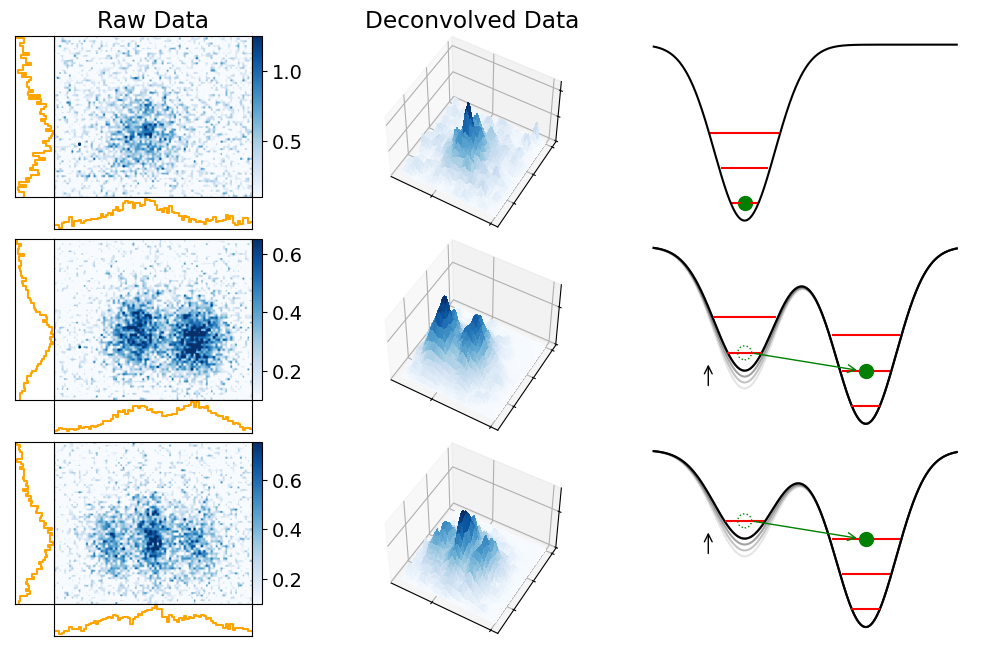

In [927]:
cmap='Blues'
fig = plt.figure(figsize=(10,6))
axs = []
for num in range(9):
    axs.append(fig.add_subplot(3,3,num+1,projection='rectilinear' if num not in [1,4,7] else '3d'))
iterations = 2
    

n0Reconstruction = restoration.richardson_lucy(n0Image, psf, iterations=iterations, clip=False, filter_epsilon=1e3)
n0PsfBlur = scipy.signal.convolve2d(n0Image, psf, 'same')
y = np.arange(len(n0Reconstruction))
x = np.arange(len(n0Reconstruction[0]))
XX, YY = np.meshgrid(x,y)
#n1Image = resn1['images']['1.00'][2]
n1Reconstruction = restoration.richardson_lucy(n1Image, psf, iterations=iterations, clip=False, filter_epsilon=1e3)
n1PsfBlur = scipy.signal.convolve2d(n1Image, psf, 'same')


n2Reconstruction = restoration.richardson_lucy(n2Image, psf, iterations=iterations, clip=False, filter_epsilon=1e3)
n2PsfBlur = scipy.signal.convolve2d(n2Image, psf, 'same')


mp.fancyImshow(fig, axs[0], n0Image, imageArgs={'vmin':0.1,'vmax':1.25,'cmap':cmap}, flipVAx=True, ticklabels=False, 
               subplotsAdjustArgs={'left': 0, 'bottom': 0, 'right': 1, 'top': 1, 'wspace': 0, 'hspace': 0.05})
mp.fancyImshow(fig, axs[3], n1Image,imageArgs= {'vmin':0.1,'vmax':0.65,'cmap':cmap}, flipVAx=True, ticklabels=False,
              subplotsAdjustArgs={'left': 0, 'bottom': 0, 'right': 1, 'top': 1, 'wspace': 0, 'hspace': 0.05})
mp.fancyImshow(fig, axs[6], n2Image, imageArgs={'vmin':0.1,'vmax':0.75,'cmap':cmap}, flipVAx=True, ticklabels=False,
              subplotsAdjustArgs={'left': 0, 'bottom': 0, 'right': 1, 'top': 1, 'wspace': 0, 'hspace': 0.05});
# 2d plots

axs[1].plot_surface(XX,YY,n0Reconstruction, cmap=cmap, antialiased=False)
axs[4].plot_surface(XX,YY,n1Reconstruction, cmap=cmap, antialiased=False)
axs[7].plot_surface(XX,YY,n2Reconstruction, cmap=cmap, antialiased=False)

#axs[1].plot_surface(XX,YY,n0PsfBlur, cmap=cmap, antialiased=False)
#axs[4].plot_surface(XX,YY,n1PsfBlur, cmap=cmap, antialiased=False)
#axs[7].plot_surface(XX,YY,n2PsfBlur, cmap=cmap, antialiased=False)


for ax in [axs[1],axs[4],axs[7]]:
    ax.set_zlim(0,None)
    ax.view_init(50,120)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    
spacing = 0.4

axs[2].axis('off');
xpts = np.linspace(-1,1,1000)
ypts = gaussian.f(xpts, -1, -spacing, 0.2, 0)
ew0, ew1, ew2 = 0.09, 0.15, 0.22
xp0 = np.linspace(-spacing-ew0,-spacing+ew0)
xp1 = np.linspace(-spacing-ew1,-spacing+ew1)
xp2 = np.linspace(-spacing-ew2,-spacing+ew2)
zpe = 0.1
axs[2].plot(xp0,[-1+zpe for _ in xp1],color='r')
axs[2].plot(xp1,[-1+3*zpe for _ in xp1],color='r')
axs[2].plot(xp2,[-1+5*zpe for _ in xp1],color='r')
axs[2].plot(xpts,ypts,color='k')
axs[2].plot(-spacing,-1+zpe,'o',color='g')
axs[2].scatter(-spacing,-1+zpe,color='g',s=100)

axs[5].axis('off');
for alpha, lamp in zip(np.linspace(0.1,0.5,4), np.linspace(-0.8,-0.7,4)):
    ypts = gaussian.f(xpts, lamp,-spacing, 0.2, 0) + gaussian.f(xpts, -1,spacing, 0.2, 0)
    axs[5].plot(xpts,ypts,color='k',alpha=alpha)
lamp=-0.7
ypts = gaussian.f(xpts, lamp,-spacing, 0.2, 0) + gaussian.f(xpts, -1,spacing, 0.2, 0)
axs[5].plot(xpts,ypts,color='k')

ew0l=0.11
ew1l=0.2
xp0 = np.linspace(-spacing-ew0l,-spacing+ew0l)
xp1 = np.linspace(-spacing-ew1l,-spacing+ew1l)
axs[5].plot(xp0,[lamp+zpe for _ in xp1],color='r')
axs[5].plot(xp1,[lamp+3*zpe for _ in xp1],color='r')

xp0 = np.linspace(spacing-ew0,spacing+ew0)
xp1 = np.linspace(spacing-ew1,spacing+ew1)
xp2 = np.linspace(spacing-ew2,spacing+ew2)
axs[5].plot(xp0,[-1+zpe for _ in xp1],color='r')
axs[5].plot(xp1,[-1+3*zpe for _ in xp1],color='r')
axs[5].plot(xp2,[-1+5*zpe for _ in xp1],color='r')
axs[5].scatter(-spacing,lamp+zpe,color='g',facecolors='none',linestyle=':',s=100,zorder=10)
axs[5].scatter(spacing,-1+3*zpe,color='g',s=100,zorder=10)
axs[5].annotate("", xytext=(-spacing*0.9, lamp+zpe), xy=(0.9*spacing,-1+3*zpe),
                 arrowprops=dict(arrowstyle="->",color='g'), color='g')
axs[5].annotate("", xytext=(-1.6*spacing, -0.8), xy=(-1.6*spacing,-0.65),
                 arrowprops=dict(arrowstyle="->", color='k'))

axs[8].axis('off');

for alpha, lamp in zip(np.linspace(0.1,0.5,4), np.linspace(-0.6,-0.5,4)):
    ypts = gaussian.f(xpts, lamp,-spacing, 0.2, 0) + gaussian.f(xpts, -1,spacing, 0.2, 0)
    axs[8].plot(xpts,ypts,color='k',alpha=alpha)
lamp=-0.5
ypts = gaussian.f(xpts, lamp,-spacing, 0.2, 0) + gaussian.f(xpts, -1,spacing, 0.2, 0)
ew0, ew1, ew2 = 0.09, 0.15, 0.22

axs[8].plot(xpts,ypts,color='k')

ew0l=0.12
xp0 = np.linspace(-spacing-ew0l,-spacing+ew0l)
axs[8].plot(xp0,[lamp+zpe for _ in xp1],color='r')

xp0 = np.linspace(spacing-ew0,spacing+ew0)
xp1 = np.linspace(spacing-ew1,spacing+ew1)
xp2 = np.linspace(spacing-ew2,spacing+ew2)

axs[8].plot(xp0,[-1+zpe for _ in xp1],color='r')
axs[8].plot(xp1,[-1+3*zpe for _ in xp1],color='r')
axs[8].plot(xp2,[-1+5*zpe for _ in xp1],color='r')

axs[8].scatter(-spacing,lamp+zpe,color='g',facecolors='none',linestyle=':',s=100,zorder=10)
axs[8].scatter(spacing,-1+5*zpe,color='g',s=100,zorder=10)
axs[8].annotate("", xytext=(-1.6*spacing, -0.6), xy=(-1.6*spacing,-0.45),
                 arrowprops=dict(arrowstyle="->", color='k'))
axs[8].annotate("", xytext=(-spacing*0.9, lamp+zpe), xy=(0.9*spacing,-1+5*zpe),
                 arrowprops=dict(arrowstyle="->", color='g'))

axs[0].set_title('Raw Data')
axs[1].set_title('Deconvolved Data')

Text(0.5, 1.0, 'PSF-Blur Data')

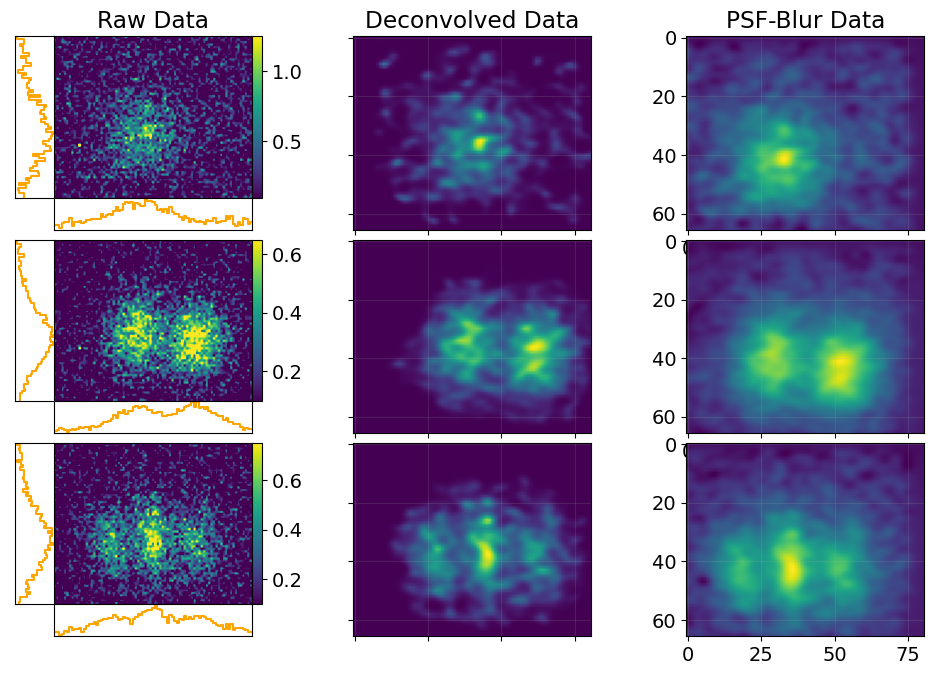

In [932]:
cmap='viridis'
fig = plt.figure(figsize=(10,6))
axs = []
filterSize=2
for num in range(9):
    axs.append(fig.add_subplot(3,3,num+1,projection='rectilinear'))# if num not in [1,4,7] else '3d'))

filterEps = 1e3
rlIterations = 5
    
#n0Reconstruction = ndimage.gaussian_filter(n0Image,filterSize)
n0Reconstruction = restoration.richardson_lucy(n0Image, psf, iterations=rlIterations, clip=False, filter_epsilon=filterEps)
n0PsfBlur = scipy.signal.convolve2d(n0Image, psf, 'same')
y = np.arange(len(n0Reconstruction))
x = np.arange(len(n0Reconstruction[0]))
XX, YY = np.meshgrid(x,y)
n1Reconstruction = restoration.richardson_lucy(n1Image, psf, iterations=rlIterations, clip=False, filter_epsilon=filterEps)
n1PsfBlur = scipy.signal.convolve2d(n1Image, psf, 'same')

n2Reconstruction = restoration.richardson_lucy(n2Image, psf, iterations=rlIterations, clip=False, filter_epsilon=filterEps)
n2PsfBlur = scipy.signal.convolve2d(n2Image, psf, 'same')

mp.fancyImshow(fig, axs[0], n0Image, imageArgs={'vmin':0.1,'vmax':1.25,'cmap':cmap}, flipVAx=True, ticklabels=False, 
               subplotsAdjustArgs={'left': 0, 'bottom': 0, 'right': 1, 'top': 1, 'wspace': 0, 'hspace': 0.05})
mp.fancyImshow(fig, axs[3], n1Image,imageArgs= {'vmin':0.1,'vmax':0.65,'cmap':cmap}, flipVAx=True, ticklabels=False,
              subplotsAdjustArgs={'left': 0, 'bottom': 0, 'right': 1, 'top': 1, 'wspace': 0, 'hspace': 0.05})
mp.fancyImshow(fig, axs[6], n2Image, imageArgs={'vmin':0.1,'vmax':0.75,'cmap':cmap}, flipVAx=True, ticklabels=False,
              subplotsAdjustArgs={'left': 0, 'bottom': 0, 'right': 1, 'top': 1, 'wspace': 0, 'hspace': 0.05});

axs[1].imshow(n0Reconstruction, cmap=cmap)
axs[4].imshow(n1Reconstruction, cmap=cmap)
axs[7].imshow(n2Reconstruction, cmap=cmap)

axs[2].imshow(n0PsfBlur, cmap=cmap)
axs[5].imshow(n1PsfBlur, cmap=cmap)
axs[8].imshow(n2PsfBlur, cmap=cmap)

for ax in [axs[1],axs[4],axs[7]]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

axs[0].set_title('Raw Data')
axs[1].set_title('Deconvolved Data')
axs[2].set_title('PSF-Blur Data')

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



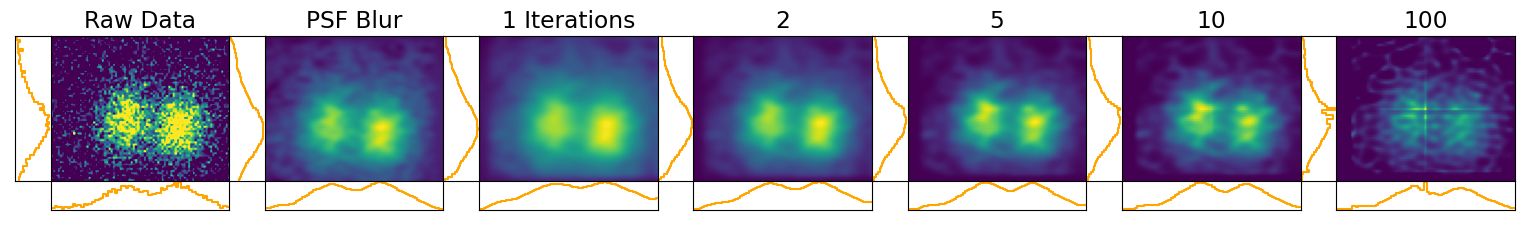

In [933]:
cmap='viridis'
fig, axs = plt.subplots(1,7,figsize=(15,3))
filterEps = 1e3

n1PsfBlur = scipy.signal.convolve2d(n1Image, psf, 'same')

mp.fancyImshow(fig, axs[0], n1Image, imageArgs={'vmin':0.1,'vmax':0.55,'cmap':cmap}, flipVAx=True, ticklabels=False, 
               subplotsAdjustArgs={'left': 0, 'bottom': 0, 'right': 1, 'top': 1, 'wspace': 0, 'hspace': 0.05}, cb=False,)
axs[0].set_title('Raw Data')
mp.fancyImshow(fig, axs[1], n1PsfBlur, imageArgs={'cmap':cmap}, flipVAx=True, ticklabels=False, 
               subplotsAdjustArgs={'left': 0, 'bottom': 0, 'right': 1, 'top': 1, 'wspace': 0, 'hspace': 0.05}, cb=False,)
axs[1].set_title('PSF Blur')
for num, iterations in enumerate([1,2,5,10,100]):
    n1Reconstruction = restoration.richardson_lucy(n1PsfBlur, psf, iterations=iterations, clip=False, filter_epsilon=filterEps)
    mp.fancyImshow(fig, axs[num+2], n1Reconstruction, imageArgs={'cmap':cmap}, flipVAx=True, ticklabels=False, cb=False,
                   subplotsAdjustArgs={'left': 0, 'bottom': 0, 'right': 1, 'top': 1, 'wspace': 0, 'hspace': 0.05})
    axs[num+2].set_title(str(iterations) + (' Iterations' if num==0 else ''))

## Expansions

In [21]:
import matplotlib.animation as animation
from IPython.display import HTML

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [903]:
def animateImageSeries(times, images, hIntData=None, vIntData=None, interval=10,
                      imshow_args = None, yticklabels=None, ylabel=None, normalizeImages=True, dataScales=None, unitFactor=1e6, unitTxt=r' \mu s$'):
    if imshow_args == None:
        imshow_args = {'cmap':dark_viridis_cmap}
    maxInit = max(images[0].flatten())
    imshow_args.update( {'vmin':0, 'vmax':maxInit})
    Z = np.zeros(images[0].shape)
    fig = plt.figure(figsize=(7,5))
    ax = plt.axes()
    if hIntData == None and vIntData == None:
        im = ax.imshow(Z, **imshow_args)
    else:
        res = mp.fancyImshow(fig, ax, Z, imageArgs=imshow_args);
        ax, cax, hax, vax, hAvg, vAvg, im, vintline, hintline = res
        cax.set_yticklabels([])
        hax.set_yticklabels(yticklabels)
        hax.set_ylabel(ylabel)        
        hax.set_xlim(0,max(hIntData[0]))
        vax.set_ylim(0,max(vIntData[0]))
    def init():
        im.set_data(np.zeros(Z.shape))
        return
    def animateFunc(n, *args, **kwargs):
        misc.loopProgress(n, len(times),"Image Series Progress: ", clear=True)
        if animateFunc.tb is not None:
            animateFunc.tb.set_visible(False)
        animateFunc.tb = ax.text(0.1, 0.1, r'$t='+misc.round_sig_str(times[n]*unitFactor)+unitTxt,
                                 bbox=dict(facecolor='w', alpha=1), 
                                 color='k', fontsize=15, transform=ax.transAxes)
        maxn =  max(images[n].flatten())
        # if I remember correctly its nontrivial / not possible to update the imshow args to change vmin / vmax directly. 
        dsFactor = 1 if dataScales is None else dataScales[n]
        im.set_data(images[n] * maxInit * dsFactor / maxn)
        if hIntData == None and vIntData == None:
            return
        hintline[0].set_data(hIntData[n], np.arange(len(hIntData[n])))
        vintline[0].set_data(np.arange(len(vIntData[n])), vIntData[n])
        vax.set_ylim(0,max(vIntData[n]))
        hax.set_xlim(0,max(hIntData[n]))
        return
    animateFunc.tb = None
    ani = animation.FuncAnimation(fig, animateFunc, init_func=init, frames=len(images), interval=interval, blit=False, repeat=True)
    plt.close()
    return HTML(ani.to_html5_video()), ani

### N=0 Expansion

In [912]:
ims = np.array([im[2] for im in resn0['images'].values()])
hint, vint = [], []
for im in ims:
    hi, vi = ah.collapseImage(im)
    hint.append(hi)
    vint.append(vi)
ims_recovered = [restoration.richardson_lucy(im, psf, iterations=2, clip=False, filter_epsilon=2e3) for im in ims]
ims_blurred = [scipy.signal.convolve2d(im, psf, 'same') for im in ims]

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [913]:
res=animateImageSeries(resn0['dataKey'], ims, interval=1000, hIntData=hint, vIntData=vint, yticklabels=[], imshow_args={'cmap':'Blues'}, dataScales = [1,1,1,1,1.2,2],
                   unitFactor=1e3, unitTxt=r' ms$')
res[1].save('C:/Users/Regal-Lab/Code/Data-Analysis-Code/N0Raw.gif')
res[0]

Image Series Progress:  83.3 % Complete...


In [914]:
res = animateImageSeries(resn0['dataKey'], ims_recovered, interval=500, hIntData=hint, vIntData=vint, yticklabels=[], imshow_args={'cmap':'Blues'}, dataScales = [1,1,1,1,1,1], unitFactor=1e3, unitTxt=r' ms$')
res[1].save('C:/Users/Regal-Lab/Code/Data-Analysis-Code/N0Reconstructed.gif')
res[0]

Image Series Progress:  83.3 % Complete...


### N=1 Expansion

In [916]:
ims = np.array([im[2] for im in resN1Exp['images'].values()])
hint, vint = [], []
for im in ims:
    hi, vi = ah.collapseImage(im)
    hint.append(hi)
    vint.append(vi)
res = animateImageSeries(resN1Exp['dataKey'], ims, interval=500, hIntData=hint, vIntData=vint, yticklabels=[], imshow_args={'cmap':'Blues'}, dataScales = [1,1,1,1,1,1,1], unitFactor=1e3, unitTxt=r' ms$')
res[1].save('C:/Users/Regal-Lab/Code/Data-Analysis-Code/N1Raw.gif')
res[0]

Image Series Progress:  85.7 % Complete...


In [918]:
ims_recovered = [restoration.richardson_lucy(im, psf, iterations=2, clip=False, filter_epsilon=1e3) for im in ims]
ims_blurred = [scipy.signal.convolve2d(im, psf, 'same') for im in ims]

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [919]:
res = animateImageSeries(resN1Exp['dataKey'], ims_recovered, interval=500, hIntData=hint, vIntData=vint, yticklabels=[], imshow_args={'cmap':'Blues'}, dataScales = [1,1,1,1,1,1,1], unitFactor=1e3, unitTxt=r' ms$')
res[1].save('C:/Users/Regal-Lab/Code/Data-Analysis-Code/N1Reconstructed.gif')
res[0]

Image Series Progress:  85.7 % Complete...


In [902]:
type(res)

IPython.core.display.HTML

In [909]:
res[1].save('C:/Users/Regal-Lab/Code/Data-Analysis-Code/testgif.gif')

Image Series Progress:  85.7 % Complete...


### N=2 Expansion

no data for this (yet?)